In [17]:
# import utils
import sys, os
parent_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), ''))
sys.path.insert(0,parent_dir)
from utils import *

from biopandas.pdb import PandasPdb
import matplotlib.pyplot as plt
dpi = 400
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'

In [13]:
# make the sim_no_overlap_waters.csv
import MDAnalysis

#RMSF get all non consensus binding sites
sim_frames = pd.melt(pd.read_csv('../water_consensus/wat_reports_bind_dist3.2_time10_skip1_rmsdcut3.4.csv'),id_vars=['simulation','other_atom']).rename(columns={'value':'bind','variable':'frame'})
print(len(sim_frames))
sim_frames = sim_frames[sim_frames.bind.notnull()]
#all_df = pd.read_csv('wat_binding_spots_and_cooords_agreement_md_dist3.2_time10_skip1_rmsdcut3.4.csv')
print(len(sim_frames))

model = PDB22_F #PDB23_F
u22 = MDAnalysis.Universe(model)
waters = u22.select_atoms(WAT_SELECTION)
for i,atom in tqdm(enumerate(waters)):
    binding_site = u22.select_atoms(f"({RNA_SELECTION}) and around {WAT_MAX_DIST} (resname {atom.resname} and resnum {atom.resnum} and name {atom.name})")
    bind = [str(atom.resnum-21)+"_"+atom.resname+"_"+atom.name if atom.name not in ["OP1","OP2"] else str(atom.resnum-21)+"_"+atom.resname+"_"+"OP" for atom in binding_site]
    bind = [x for x in sorted(bind,key=lambda pair: (int(pair.split('_')[0]),pair.split('_')[2]))]

    bind = ' '.join(bind)

    overlap = sim_frames.bind.apply(lambda x: get_number_exact_overlap([bind],x,[bind])>0)
    sim_frames = sim_frames[~overlap]
            


/tmp/ipykernel_158197/4005339041.py:5: DtypeWarning: Columns (78,86,103,105,109,110,120,122,123,127,128,129,130,131,134,136,137,139,152,163,183,188,190,192,193,194,196,198,199,200,201,202,203,205,206,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,260,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401) have mixed types. Specify dtype option 

17754800


/home/rachael/anaconda3/envs/PE/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:438: UserWarning: PDB file contained CONECT record to TER entry. These are not included in bonds.
  warnings.warn(


2824387


263it [14:01,  3.20s/it]
0it [00:00, ?it/s]


TypeError: get_number_exact_overlap() missing 1 required positional argument: 'compare_close'

In [14]:
model = PDB23_F #PDB23_F
u22 = MDAnalysis.Universe(model)
waters = u22.select_atoms(WAT_SELECTION)
for i,atom in tqdm(enumerate(waters)):
    binding_site = u22.select_atoms(f"({RNA_SELECTION}) and around {WAT_MAX_DIST} (resname {atom.resname} and resnum {atom.resnum} and name {atom.name})")
    bind = [str(atom.resnum-21)+"_"+atom.resname+"_"+atom.name if atom.name not in ["OP1","OP2"] else str(atom.resnum-21)+"_"+atom.resname+"_"+"OP" for atom in binding_site]
    bind = [x for x in sorted(bind,key=lambda pair: (int(pair.split('_')[0]),pair.split('_')[2]))]

    bind = ' '.join(bind)

    overlap = sim_frames.bind.apply(lambda x: get_number_exact_overlap([bind],x,[bind])>0)
    sim_frames = sim_frames[~overlap]

print(len(sim_frames))

sim_frames.groupby(['simulation','other_atom','bind']).frame.apply(list).reset_index().to_csv('sim_no_overlap_waters.csv',index=False)


298it [24:28,  4.93s/it]


2414033


In [18]:
import os
simno = pd.read_csv('../water_consensus/wat_reports_bind_dist3.2_time10_skip1_rmsdcut3.4.csv')#pd.read_csv('sim_no_overlap_waters.csv')
df = pd.concat([pd.read_csv(f'sim_coords/none_{i}.csv') for i in range(659) if os.path.isfile(f'sim_coords/none_{i}.csv')])
XX = pd.read_csv('sim_no_overlap_waters.csv')
XX['frame'] = XX.frame.apply(eval)
XX = XX.explode('frame') # 1698077 
XX['frame']=XX.frame.astype(int)
df = pd.merge_ordered(df, XX, on=['simulation','other_atom','frame'],how='inner')

/tmp/ipykernel_158197/282283376.py:2: DtypeWarning: Columns (78,86,103,105,109,110,120,122,123,127,128,129,130,131,134,136,137,139,152,163,183,188,190,192,193,194,196,198,199,200,201,202,203,205,206,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,260,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401) have mixed types. Specify dtype option o

In [19]:
df.groupby(['bind'])[['x','y','z']].mean()[['x','y','z']].to_numpy().shape # should group by bind site not this TODO
# 4262
# TODO also need to reduce Q_bind

(4261, 3)

In [20]:
XXX = df.groupby(['bind'])
XXX = df.groupby(['bind'])[['x','y','z']].mean()[['x','y','z']]

In [21]:
XXX

,x,y,z
bind,,,
100_C_C2' 100_C_O2 100_C_O2' 102_A_N3,112.009704,76.141707,63.900512
100_C_C2' 100_C_O2 100_C_O2' 102_A_N3 102_A_O4',111.860577,75.878974,63.996778
100_C_O2 100_C_O2' 102_A_N3,111.722382,75.843079,63.704645
100_C_O2 100_C_O2' 102_A_N3 102_A_O4',111.802274,75.779803,63.912438
100_C_O2',111.577508,74.701592,66.262483
...,...,...,...
9_A_N6,67.210665,97.316756,30.383507
9_A_N7 9_A_OP,73.918114,98.667639,31.388689
9_A_O2',76.389057,96.401826,35.502610


In [22]:
Q22 = pd.read_csv('../per_residue_comparison/per_residue_summary.csv')[['residue_number','Qscore 2.2A']].set_index('residue_number').to_dict()['Qscore 2.2A']
Q23 = pd.read_csv('../per_residue_comparison/per_residue_summary.csv')[['residue_number','Qscore 2.3A']].set_index('residue_number').to_dict()['Qscore 2.3A']
residues = [[int(bind.split('_')[0])+21 for bind in bindspot] for bindspot in XXX.index.str.split().to_list()]
Q_bind = [min([max(Q22[bind],Q23[bind]) for bind in bindspot]) for bindspot in residues]
XXX['Q_bind'] = Q_bind
#df22_water_mdsim = df22_water_mdsim[df22_water_mdsim.max_time>10/400]
XXX = XXX[XXX.Q_bind>=0.6] 

In [23]:
from glob import glob
T = np.array([32.76050292968705,117.57653311234981,205.87105939568346])
R = np.array([[0.739067018032074, -0.2264893501996994, 0.6344150900840759],
 [-0.6706261038780212, -0.15851205587387085, 0.7246617078781128],
 [-0.06356571614742279, -0.9610288739204407, -0.26904070377349854]])

coord = [86.90399,  72.69817,  63.753284]
print(np.matmul(R,coord)+T)

[120.9690598   93.97247617 113.32967619]


In [27]:
dfcon = pd.read_csv('../water_consensus/all_solvent_consensus_status_withconsensus.csv')
df22wat = dfcon[(dfcon.model=='2.2Å') & (dfcon.solvent=="HOH")].copy()
df23wat = dfcon[(dfcon.model=='2.3Å') & (dfcon.solvent=="HOH")].copy()

df22wat['Consensus'] = df22wat['consensus of wat in 2.3Å'] #((df22wat['within 1A of wat in 2.3Å']>0) & (df22wat['exact binding spot of wat in 2.3Å']>0))
df23wat['Consensus'] = df23wat['consensus of wat in 2.2Å'] #((df23wat['within 1A of wat in 2.2Å']>0) & (df23wat['exact binding spot of wat in 2.2Å']>0))

con22 = df22wat[df22wat.Consensus].residue_number.to_list()
con23 = df23wat[df23wat.Consensus].residue_number.to_list()
molar_conversion = 1660.54/(30*30.0063) # extra 30 is just because the 30 simulation were summed not averages


get_d22_dens = get_density_interpolator(MRC22_F)
get_md_wat_dens = get_density_interpolator('../../simulations/nt_wat.mrc')
pdb = PandasPdb().read_pdb(PDB22_F)
pdb.df["ATOM"] = pdb.df["ATOM"][pdb.df["ATOM"].element_symbol!="H"].reset_index()
# TODO NEED TO include 23in22 !!! and 23 in 23 map
all_wat_dens, all_EM_dens,consesnus_stats = [],[],[]
for i in tqdm(range(len(pdb.df["HETATM"]))):
    current_atom = pdb.df["HETATM"].iloc[i]
    if current_atom.residue_name == 'HOH':
        atom_coord = current_atom[['x_coord','y_coord','z_coord']].to_list()
        all_wat_dens.append(get_md_wat_dens(atom_coord)[0]*molar_conversion)
        all_EM_dens.append(get_d22_dens(atom_coord)[0])
        consesnus_stats.append(1+(current_atom.residue_number in con22))
pdb = PandasPdb().read_pdb(PDB23_F)
pdbalign = PandasPdb().read_pdb('../../models/23in22.pdb')
get_d23_dens = get_density_interpolator(MRC23_F)
for i in tqdm(range(len(pdb.df["HETATM"]))):
    current_atom = pdb.df["HETATM"].iloc[i]
    if current_atom.residue_name == 'HOH':
        atom_coord = current_atom[['x_coord','y_coord','z_coord']].to_list()
        align_coord = pdbalign.df["ATOM"][pdbalign.df["ATOM"].residue_number==current_atom.residue_number][['x_coord','y_coord','z_coord']].iloc[0].to_list()
        all_EM_dens.append(get_d23_dens(atom_coord)[0])
        all_wat_dens.append(get_md_wat_dens(align_coord)[0]*molar_conversion)
        consesnus_stats.append(1+(current_atom.residue_number in con23))
#all_none = pd.concat([pd.read_csv(f) for f in glob('../analysis/sim_coords/none_*.csv')])
#none_coords = all_none.groupby(['simulation','other_atom']).mean()[['x','y','z']].to_numpy() # should group by bind site not this TODO
for coord in tqdm(XXX[['x','y','z']].to_numpy()):
    sim_coord = np.matmul(R,coord)+T
    all_EM_dens.append(get_d22_dens(sim_coord)[0])
    all_wat_dens.append(get_md_wat_dens(sim_coord)[0]*molar_conversion)
    consesnus_stats.append(0)

100%|███████████████████████████████████████████████████████████████████████████| 3442/3442 [00:02<00:00, 1242.41it/s]


Kruskal: 852.2936530762963, p=8.448600097794067e-186
276 285 3442
mean 11.112894573569964 8.088498001313742 2.4755164883502148
median 10.3334614899944 7.196279298856618 1.804883621060277
Q3 13.048822749395452 9.455665480970577 4.816753009969757
mannwhitneyu non-all: 84479.0, p=5.81776873054394e-115
mannwhitneyu non-some: 145371.0, p=2.747722767715089e-87
mannwhitneyu some-all: 19777.0, p=1.1328479263235594e-24
mannwhitneyu some-all: 229850.0, p=5.6764249693996556e-185


/tmp/ipykernel_158197/40199016.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=densdf,y='EM',x='con',order=[2,1,0],


Kruskal: 166.13271104002698, p=8.408918936919668e-37
276 285 3442
mean 80.39882734644505 71.2439326087459 59.96512786069498
median 76.98326503095646 68.71632492310054 52.56878106928055
Q3 98.34064068609517 83.54288067931407 76.6345523162882
mannwhitneyu non-all: 289334.0, p=1.3791962736124891e-27
mannwhitneyu non-some: 355445.0, p=5.151510430709387e-15
mannwhitneyu some-all: 32319.5, p=0.00012994211677579953
mannwhitneyu some-all: 644779.0, p=6.812398918914076e-37


/tmp/ipykernel_158197/40199016.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=densdf,y='MD',x='con',order=['2','1','0'],
/tmp/ipykernel_158197/40199016.py:87: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  g = sns.violinplot(data=densdf,y='MD',x='con',order=['2','1','0'],


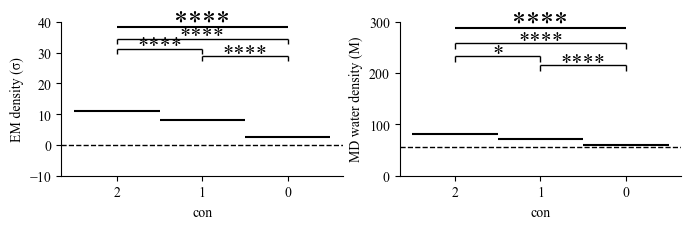

In [33]:
import seaborn as sns
from scipy import stats
densdf = pd.DataFrame(np.array([all_EM_dens,all_wat_dens,consesnus_stats]).T,columns=['EM','MD','con'])
#sns.violinplot(data=densdf,y='EM',x='con') #,y='MD'
# units ---> 
# hline at 55!!
ticksize = 12
labelsize = 14
dpi = 400
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'
h2o_color = '#df0303'
h2o_light_color = '#f29a9a'
fig,axes = plt.subplots(1,2,figsize=(8,2),sharex=False,sharey=False)
def get_sig(p):
    if p>0.05: sig="n.s."
    elif p>0.0001:  sig="*"
    elif p>0.000001: sig="**"
    elif p>0.00000001: sig="***"
    else: sig="****"
    return sig
def Kruskal_and_mannwhitney(g1,g2,g3):
    s_overall,p_overall = stats.kruskal(g1,g2,g3, nan_policy='omit')
    print(f"Kruskal: {s_overall}, p={p_overall}")
    print(len(g1),len(g2),len(g3))
    g1 = g1[~np.isnan(g1)]
    g2 = g2[~np.isnan(g2)]
    g3 = g3[~np.isnan(g3)]
    print('mean',g1.mean(),g2.mean(),g3.mean())
    print('median',np.median(g1),np.median(g2),np.median(g3))
    print('Q3',np.percentile(g1,75),np.percentile(g2,75),np.percentile(g3,75))
    t_none_all, p_none_all = stats.mannwhitneyu(g3, g1)
    print(f"mannwhitneyu non-all: {t_none_all}, p={p_none_all}")
    t_none_some, p_none_some = stats.mannwhitneyu(g3, g2)
    print(f"mannwhitneyu non-some: {t_none_some}, p={p_none_some}")
    t_some_all, p_some_all = stats.mannwhitneyu(g2, g1)
    print(f"mannwhitneyu some-all: {t_some_all}, p={p_some_all}")
    t_x, p_x = stats.mannwhitneyu(np.append(g2, g1), g3)
    print(f"mannwhitneyu some-all: {t_x}, p={p_x}")
    return p_overall,p_none_all,p_none_some,p_some_all,g3.mean(),g2.mean(),g1.mean()#np.percentile(g3,75),np.percentile(g2,75),np.percentile(g1,75)#

g1 = densdf[densdf.con==2]['EM'].values
g2 = densdf[densdf.con==1]['EM'].values
g3 = densdf[densdf.con==0]['EM'].values
p_overall,p_none_all,p_none_some,p_some_all,mean_2,mean_1,mean_0 = Kruskal_and_mannwhitney(g1,g2,g3)
g = sns.violinplot(data=densdf,y='EM',x='con',order=[2,1,0],
             palette={'2':h2o_color,
                  '1':h2o_light_color,
                 '0':"gold"},
                  density_norm='width', #scale="width",
                   inner=None,linewidth=0,ax=axes[0])
g.hlines(mean_0,-0.5,0.5,"black")
g.hlines(mean_1,0.5,1.5,"black")
g.hlines(mean_2,1.5,2.5,"black")
xmin,xmax = g.get_xlim()
axes[0].hlines(0,xmin,xmax,"black",linewidth=1,linestyles='dashed')
g.set_xlim(xmin,xmax)
maxtime=40
sns.despine()
ax = axes[0]
ax.set_ylim(-10,maxtime)
text_to_add = [get_sig(p) for p in [p_overall,p_none_all,p_none_some,p_some_all]]
sizes = [16 if x!="n.s." else 12 for x in text_to_add]
sizes[0] += 4
x_adjust = [-0.02 if x!="n.s." else 0.02 for x in text_to_add]
ax.text(1,maxtime*(0.96+x_adjust[0]),text_to_add[0],rotation=0,size=sizes[0],ha="center")
ax.hlines(maxtime*0.96,0,2,"black")
ax.text(1,maxtime*(0.86+x_adjust[1]),text_to_add[1],rotation=0,size=sizes[1],ha="center")
ax.hlines(maxtime*0.86,0,2,"black",linewidth=1)
ax.vlines(0,maxtime*0.86,maxtime*0.82,"black",linewidth=1)
ax.vlines(2,maxtime*0.86,maxtime*0.82,"black",linewidth=1)
ax.text(0.5,maxtime*(0.78+x_adjust[3]),text_to_add[3],rotation=0,size=sizes[3],ha="center")
ax.hlines(maxtime*0.78,0,1,"black",linewidth=1)
ax.vlines(0,maxtime*0.78,maxtime*0.74,"black",linewidth=1)
ax.vlines(1,maxtime*0.78,maxtime*0.74,"black",linewidth=1)
ax.text(1.5,maxtime*(0.72+x_adjust[3]),text_to_add[2],rotation=0,size=sizes[2],ha="center")
ax.hlines(maxtime*0.72,1,2,"black",linewidth=1)
ax.vlines(1,maxtime*0.72,maxtime*0.68,"black",linewidth=1)
ax.vlines(2,maxtime*0.72,maxtime*0.68,"black",linewidth=1)


g1 = densdf[densdf.con==2]['MD'].values
g2 = densdf[densdf.con==1]['MD'].values
g3 = densdf[densdf.con==0]['MD'].values
p_overall,p_none_all,p_none_some,p_some_all,mean_2,mean_1,mean_0 = Kruskal_and_mannwhitney(g1,g2,g3)
g = sns.violinplot(data=densdf,y='MD',x='con',order=['2','1','0'],
             palette={'2':h2o_color,
                  '1':h2o_light_color,
                 '0':"gold"},scale="width",inner=None,linewidth=0,ax=axes[1])
g.hlines(mean_0,-0.5,0.5,"black")
g.hlines(mean_1,0.5,1.5,"black")
g.hlines(mean_2,1.5,2.5,"black")
xmin,xmax = g.get_xlim()
axes[1].hlines(55,xmin,xmax,"black",linewidth=1,linestyles='dashed')
g.set_xlim(xmin,xmax)
maxtime=300
sns.despine()
ax = axes[1]
ax.set_ylim(0,maxtime)
text_to_add = [get_sig(p) for p in [p_overall,p_none_all,p_none_some,p_some_all]]
sizes = [16 if x!="n.s." else 12 for x in text_to_add]
sizes[0] += 4
x_adjust = [-0.02 if x!="n.s." else 0.02 for x in text_to_add]
ax.text(1,maxtime*(0.96+x_adjust[0]),text_to_add[0],rotation=0,size=sizes[0],ha="center")
ax.hlines(maxtime*0.96,0,2,"black")
ax.text(1,maxtime*(0.86+x_adjust[1]),text_to_add[1],rotation=0,size=sizes[1],ha="center")
ax.hlines(maxtime*0.86,0,2,"black",linewidth=1)
ax.vlines(0,maxtime*0.86,maxtime*0.82,"black",linewidth=1)
ax.vlines(2,maxtime*0.86,maxtime*0.82,"black",linewidth=1)
ax.text(0.5,maxtime*(0.78+x_adjust[3]),text_to_add[3],rotation=0,size=sizes[3],ha="center")
ax.hlines(maxtime*0.78,0,1,"black",linewidth=1)
ax.vlines(0,maxtime*0.78,maxtime*0.74,"black",linewidth=1)
ax.vlines(1,maxtime*0.78,maxtime*0.74,"black",linewidth=1)
ax.text(1.5,maxtime*(0.72+x_adjust[3]),text_to_add[2],rotation=0,size=sizes[2],ha="center")
ax.hlines(maxtime*0.72,1,2,"black",linewidth=1)
ax.vlines(1,maxtime*0.72,maxtime*0.68,"black",linewidth=1)
ax.vlines(2,maxtime*0.72,maxtime*0.68,"black",linewidth=1)

axes[0].set_ylabel("EM density (σ)")
axes[1].set_ylabel("MD water density (M)")

plt.savefig(f"MD_EM_densites.svg",bbox_inches="tight",transparent=True)
plt.savefig(f"MD_EM_densites.png", dpi=dpi,bbox_inches="tight",transparent=True)

In [32]:
densdf

,EM,MD,con
0,23.603205,80.461428,2.0
1,22.729034,57.854679,2.0
2,22.639081,121.151439,2.0
3,22.276762,127.376261,2.0
4,21.497207,85.125981,2.0
...,...,...,...
3998,4.132317,106.307925,0.0
3999,-0.931836,9.865567,0.0
4000,2.788710,130.448746,0.0
4001,1.180841,27.452704,0.0


C:\Users\racha\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


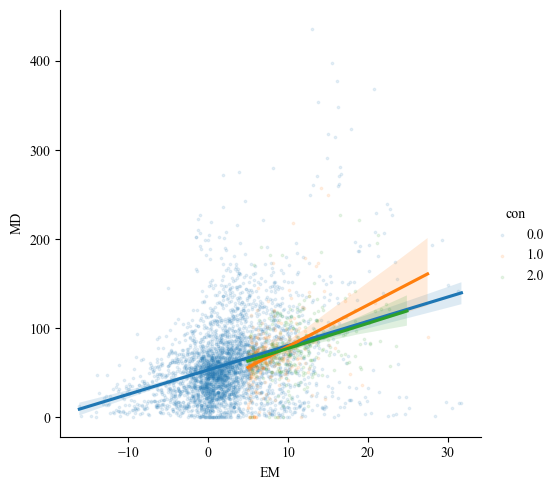

In [42]:
#ax = densdf.plot.scatter('EM','MD',alpha=0.1)
sns.lmplot(data=densdf,x="EM",y="MD",scatter_kws={'alpha':0.1,'s':3},hue='con')

In [ ]:
# NOT USED

In [5]:
pdb = PandasPdb().read_pdb(PDB22_F)
pdb.df["ATOM"] = pdb.df["ATOM"][pdb.df["ATOM"].element_symbol!="H"].reset_index()
md_df = pd.read_csv('../analysis/solv_local_env_nt.csv')
# TODO NEED TO include 23in22 !!! and 23 in 23 map
all_mg_dens, all_wat_dens, all_na_dens,residues,sims,residuesN = [],[],[],[],[],[]
for i in tqdm(range(len(pdb.df["HETATM"]))):
    current_atom = pdb.df["HETATM"].iloc[i]
    atom_coord = current_atom[['x_coord','y_coord','z_coord']].to_list()
    # get closest RNA
    atomdist = pdb.distance(xyz=atom_coord, records=('ATOM',))
    atommin = atomdist.min()

    # get total minimum and label it
    minatom = pdb.df["ATOM"].iloc[atomdist.idxmin()].residue_number
    md_fol = 'md_results5'
    model = 2.2
    md_dir = md_df[(md_df.model==model) & (md_df.resnum==minatom)].folder.item()
    # load current md itnerpolator
    with open(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/align.positions') as f:
        if model == 2.2:
            transform = [float(x) for x in f.readlines()[0].split('\n')[0].split(',')[1:]]
        elif model == 2.3:
            transform = [float(x) for x in f.readlines()[1].split('\n')[0].split(',')[1:]]
        R = np.array([transform[0:3],transform[4:7],transform[8:11]])
        T = np.array([transform[3],transform[7],transform[11]])
    mg_dens, wat_dens, na_dens = [], [], []
    all_EM_dens.append(get_d22_dens(atom_coord)[0])
    for j in range(30):
        md_wat_dens = get_density_interpolator(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/wat_{j}.dx')
        md_mg_dens = get_density_interpolator(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/mg_{j}.dx')
        md_na_dens = get_density_interpolator(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/na_{j}.dx')
        md_coords = np.matmul(R,atom_coord) + T
        all_mg_dens.append(md_mg_dens(md_coords)[0])
        all_wat_dens.append(md_wat_dens(md_coords)[0])
        all_na_dens.append(md_na_dens(md_coords)[0])
        residues.append(current_atom.residue_number)
        residuesN.append(current_atom.residue_name)
        sims.append(j)

  2%|█▍                                                                              | 6/334 [02:27<2:14:41, 24.64s/it]


KeyboardInterrupt: 

In [53]:
df = pd.DataFrame(np.array([residues,residuesN,sims,all_mg_dens, all_wat_dens, all_na_dens]).T,columns=['res','name','sim','mg','wat','na'])
df.to_csv('MD_densities.csv',index=False)

In [132]:
pdb = PandasPdb().read_pdb(PDB23_ALIGNED)
pdb.df["ATOM"] = pdb.df["ATOM"][pdb.df["ATOM"].element_symbol!="H"].reset_index()
md_df = pd.read_csv('../analysis/solv_local_env_nt.csv')

all_mg_dens, all_wat_dens, all_na_dens,residues,sims,residuesN = [],[],[],[],[],[]

for i in tqdm(range(len(pdb.df["HETATM"]))):
    current_atom = pdb.df["HETATM"].iloc[i]
    atom_coord = current_atom[['x_coord','y_coord','z_coord']].to_list()
    # get closest RNA
    atomdist = pdb.distance(xyz=atom_coord, records=('ATOM',))
    atommin = atomdist.min()

    # get total minimum and label it
    minatom = pdb.df["ATOM"].iloc[atomdist.idxmin()].residue_number
    md_fol = 'md_results5'
    model = 2.2
    md_dir = md_df[(md_df.model==model) & (md_df.resnum==minatom)].folder.item()
    # load current md itnerpolator
    with open(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/align.positions') as f:
        if model == 2.2:
            transform = [float(x) for x in f.readlines()[0].split('\n')[0].split(',')[1:]]
        elif model == 2.3:
            transform = [float(x) for x in f.readlines()[1].split('\n')[0].split(',')[1:]]
        R = np.array([transform[0:3],transform[4:7],transform[8:11]])
        T = np.array([transform[3],transform[7],transform[11]])
    mg_dens, wat_dens, na_dens = [], [], []
    for j in range(30):
        md_wat_dens = get_density_interpolator(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/wat_{j}.dx')
        md_mg_dens = get_density_interpolator(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/mg_{j}.dx')
        md_na_dens = get_density_interpolator(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/na_{j}.dx')
        md_coords = np.matmul(R,atom_coord) + T
        all_mg_dens.append(md_mg_dens(md_coords)[0])
        all_wat_dens.append(md_wat_dens(md_coords)[0])
        all_na_dens.append(md_na_dens(md_coords)[0])
        residues.append(current_atom.residue_number)
        residuesN.append(current_atom.residue_name)
        sims.append(j)

100%|██████████| 363/363 [1:37:10<00:00, 16.06s/it]


In [133]:
df = pd.DataFrame(np.array([residues,residuesN,sims,all_mg_dens, all_wat_dens, all_na_dens]).T,columns=['res','name','sim','mg','wat','na'])
df.to_csv('MD_densities23.csv',index=False)

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('MD_densities.csv')
df1['mod'] = 2.2
df2 = pd.read_csv('MD_densities23.csv')
df1['mod'] = 2.3

df=pd.concat([df1,df2])
dfcon = pd.read_csv('../analysis/all_solvent_consensus_status.csv')
df22wat = dfcon[(dfcon.model=='2.2Å') & (dfcon.solvent=="HOH")].copy()
df23wat = dfcon[(dfcon.model=='2.3Å') & (dfcon.solvent=="HOH")].copy()

df22wat['Consensus'] = ((df22wat['within 1A of wat in 2.3Å']>0) & (df22wat['exact binding spot of wat in 2.3Å']>0))
df23wat['Consensus'] = ((df23wat['within 1A of wat in 2.2Å']>0) & (df23wat['exact binding spot of wat in 2.2Å']>0))

con22 = df22wat[df22wat.Consensus].residue_number.to_list()
con23 = df23wat[df23wat.Consensus].residue_number.to_list()

C:\Users\racha\AppData\Local\Temp\ipykernel_33944\4241371779.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['res_mod'] = df_temp['res']+df_temp['mod']
C:\Users\racha\AppData\Local\Temp\ipykernel_33944\4241371779.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.pointplot(data=df_temp[df_temp.name=='HOH'],x='res_mod',y='mg',capsize=0,join=False,ax=ax[0],ci=0,order=order,markers='x',scale=0.4,errwidth=1,palette=['#00aa00'])
C:\Users\racha\anaconda3\lib\site-packages\seaborn\categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.6666666666666666, 0.0), (0.0, 0.6666666666666666, 0.0), (0.0, 0.6666666666666666, 0.0), (0.0, 0.6666666666666666, 0.0), (0.0, 0

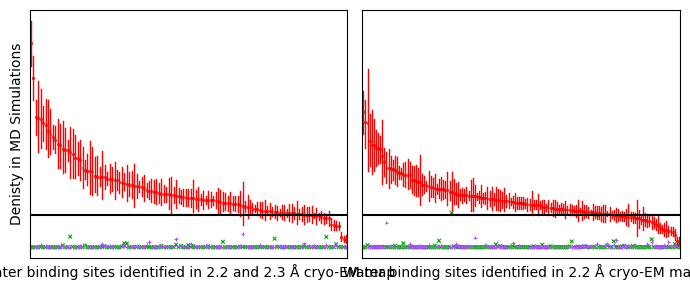

In [36]:
df['res'] = df.res.astype('int')
df['wat'] = df.wat.astype('float')
df['mg'] = df.mg.astype('float')
df['na'] = df.na.astype('float')
df_temp = df[((df.res.isin(con22))&(df['mod']==2.2))|((df.res.isin(con23))&(df['mod']==2.3))]
df_temp['res_mod'] = df_temp['res']+df_temp['mod']
fig,ax=plt.subplots(1,2,figsize=(7,3),sharey=True)
order = list(df_temp[df_temp.name=='HOH'].groupby('res_mod').wat.mean().sort_values(ascending=False).index)
sns.pointplot(data=df_temp[df_temp.name=='HOH'],x='res_mod',y='wat',capsize=0,join=False,ax=ax[0],order=order,markers=',',scale=0.2,errwidth=1,palette=['#ff0000'])
xmin,xmax = ax[0].get_xlim()
ax[0].hlines(1,xmin,xmax,color='black')
ax[0].set_xlim(xmin,xmax)
sns.pointplot(data=df_temp[df_temp.name=='HOH'],x='res_mod',y='mg',capsize=0,join=False,ax=ax[0],ci=0,order=order,markers='x',scale=0.4,errwidth=1,palette=['#00aa00'])
sns.pointplot(data=df_temp[df_temp.name=='HOH'],x='res_mod',y='na',capsize=0,join=False,ax=ax[0],ci=0,order=order,markers='+',scale=0.4,errwidth=1,palette=['#aa55ff'])
ax[0].set_ylabel('Denisty in MD Simulations')
ax[0].set_xlabel('Water binding sites identified in 2.2 and 2.3 Å cryo-EM map')
ax[0].set_xticks([])

df_temp = df[((~df.res.isin(con22))&(df['mod']==2.2))|((~df.res.isin(con23))&(df['mod']==2.3))]
df_temp['res_mod'] = df_temp['res']+df_temp['mod']

order = list(df_temp[df_temp.name=='HOH'].groupby('res_mod').wat.mean().sort_values(ascending=False).index)
sns.pointplot(data=df_temp[df_temp.name=='HOH'],x='res_mod',y='wat',capsize=0,join=False,ax=ax[1],order=order,markers=',',scale=0.2,errwidth=1,palette=['#ff0000'])
xmin,xmax = ax[1].get_xlim()
ax[1].hlines(1,xmin,xmax,color='black')
ax[1].set_xlim(xmin,xmax)
sns.pointplot(data=df_temp[df_temp.name=='HOH'],x='res_mod',y='mg',capsize=0,join=False,ax=ax[1],ci=0,order=order,markers='x',scale=0.4,errwidth=1,palette=['#00aa00'])
sns.pointplot(data=df_temp[df_temp.name=='HOH'],x='res_mod',y='na',capsize=0,join=False,ax=ax[1],ci=0,order=order,markers='+',scale=0.4,errwidth=1,palette=['#aa55ff'])
ax[1].set_ylabel('')
ax[1].set_xlabel('Water binding sites identified in 2.2 Å cryo-EM map')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()
plt.savefig(f"figure_panels/MD_densities.png",dpi=dpi,bbox_inches="tight",transparent=True)
plt.savefig(f"figure_panels/MD_densities.svg",bbox_inches="tight",transparent=True)

In [32]:
df[(df.name=='HOH')&((~df.res.isin(con22))&(df['mod']==2.2))|((~df.res.isin(con23))&(df['mod']==2.3))].groupby('res').wat

In [38]:
from scipy import stats
df['res'] = df.res.astype('int')
df['wat'] = df.wat.astype('float')
df['mg'] = df.mg.astype('float')
df['na'] = df.na.astype('float')
df['res_mod'] = df['res']+df['mod']

g1 = df[(df.name=='HOH')&((df.res.isin(con22))&(df['mod']==2.2))|((df.res.isin(con23))&(df['mod']==2.3))].groupby('res_mod').wat.mean().values
g2 = df[(df.name=='HOH')&((~df.res.isin(con22))&(df['mod']==2.2))|((~df.res.isin(con23))&(df['mod']==2.3))].groupby('res_mod').wat.mean().values

print(stats.mannwhitneyu(g2, g1))
print(g1.mean())
print(g2.mean())
print(stats.percentileofscore(g1,2))
print(stats.percentileofscore(g2,2))

MannwhitneyuResult(statistic=10335.0, pvalue=0.0007793387247344263)
1.7916979124981813
1.4711265093705848
69.76744186046513
82.4390243902439


<AxesSubplot:xlabel='res', ylabel='value'>

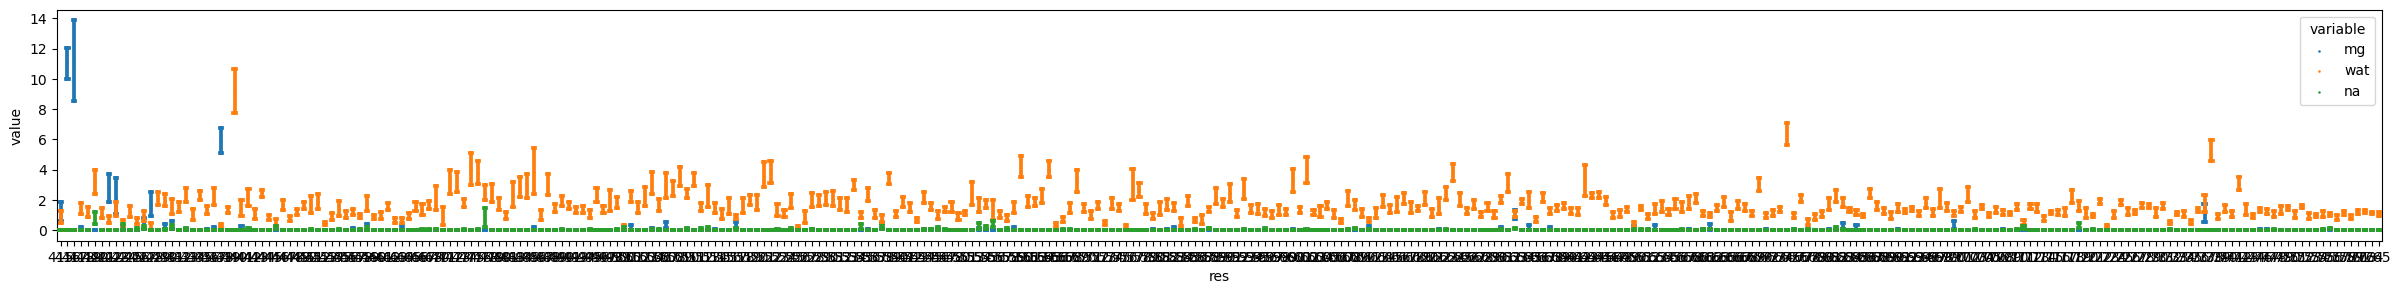

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
dfn = pd.melt(df, id_vars=['res','name','sim'], value_vars=['mg','wat','na'])
dfn['res'] = dfn.res.astype('int')
dfn['value'] = dfn.value.astype('float')
fig,ax=plt.subplots(1,figsize=(30,3))

sns.pointplot(data=dfn,x='res',y='value', errorbar='sd',capsize=.3,join=False,hue='variable',ax=ax,scale=0.2)
# TODO only waters -- water likelihood?
# TODO may need to order???
# mark water density 1
# for mg, na maybe plot std instead of desity?? or just * sig ones


In [1]:
df

NameError: name 'df' is not defined

In [36]:
print('zip md_get_dense_dxs.zip '+' '.join((md_df.run_name + '/' + md_df.folder.astype(int).astype(str) +'/*.dx').to_list()))

zip md_get_dense_dxs.zip md_results2/0/*.dx md_results2/1/*.dx md_results/2/*.dx md_results2/2/*.dx md_results2/3/*.dx md_results2/4/*.dx md_results/59/*.dx md_results/6/*.dx md_results2/6/*.dx md_results2/7/*.dx md_results2/8/*.dx md_results2/9/*.dx md_results/86/*.dx md_results/9/*.dx md_results2/10/*.dx md_results/12/*.dx md_results2/11/*.dx md_results2/12/*.dx md_results2/13/*.dx md_results2/14/*.dx md_results/17/*.dx md_results2/15/*.dx md_results/20/*.dx md_results/21/*.dx md_results/22/*.dx md_results2/16/*.dx md_results/25/*.dx md_results2/17/*.dx md_results/27/*.dx md_results2/18/*.dx md_results/189/*.dx md_results/29/*.dx md_results/201/*.dx md_results/31/*.dx md_results/216/*.dx md_results2/19/*.dx md_results/224/*.dx md_results/226/*.dx md_results/231/*.dx md_results2/20/*.dx md_results2/21/*.dx md_results/235/*.dx md_results/244/*.dx md_results/246/*.dx md_results/35/*.dx md_results/37/*.dx md_results/38/*.dx md_results/268/*.dx md_results4/0/*.dx md_results/39/*.dx md_res

In [42]:
k=48
md_file = '../simulations/local_align_md/current_md_loc_new_new.csv'
pdb_f = PDB22_F
model = 2.2


md_df = pd.read_csv(md_file)
df22 = PandasPdb().read_pdb(pdb_f)
all_mg_dens, all_wat_dens = [],[]
# get coordinate of water/ion
# now our "0" point
for k in tqdm(range(len(df22.df["HETATM"]))):
    current_atom = df22.df["HETATM"].iloc[k]
    atom_coord = current_atom[['x_coord','y_coord','z_coord']].to_list()
    print(current_atom.residue_number)
    # load current md itnerpolator
    md_dir = md_df[(md_df.model==model) & (md_df.resnum==current_atom.residue_number)].folder.item()
    md_dir = int(md_dir)
    md_fol = md_df[(md_df.model==model) & (md_df.resnum==current_atom.residue_number)].run_name.item()
    if not md_fol in ['md_results3','md_results4']:
        continue
    with open(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/align.positions') as f:
        if model == 2.2:
            transform = [float(x) for x in f.readlines()[0].split('\n')[0].split(',')[1:]]
        elif model == 2.3:
            transform = [float(x) for x in f.readlines()[1].split('\n')[0].split(',')[1:]]
        R = np.array([transform[0:3],transform[4:7],transform[8:11]])
        T = np.array([transform[3],transform[7],transform[11]])
    mg_dens, wat_dens = [], []
    for i in range(30):
        md_wat_dens = get_density_interpolator(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/wat_{i}.dx')
        md_mg_dens = get_density_interpolator(f'../simulations/local_align_md/{md_fol}/{md_fol}/{md_dir}/mg_{i}.dx')
        md_coords = np.matmul(R,atom_coord) + T
        mg_dens.append(md_mg_dens(md_coords))
        wat_dens.append(md_wat_dens(md_coords))
    mg_dens = np.hstack(mg_dens)
    wat_dens = np.hstack(wat_dens)
    all_mg_dens.append(mg_dens)
    all_wat_dens.append(wat_dens)

  0%|                                                                                          | 0/334 [00:00<?, ?it/s]

415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463


 34%|██████████████████████████▊                                                     | 112/334 [00:05<00:08, 26.67it/s]

464
465
466
467
468
470
471
472
473
474
475
476
478
479
480
481
483
484
485
486
487
488
489
490
491
493
494
495
496
497
498
499
500
501
502
503
504
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534


 60%|███████████████████████████████████████████████▉                                | 200/334 [00:11<00:07, 16.92it/s]

535
536
537
538
539
540
541
542
543
544
545
546
547
548
550
551
553
554
555
556
557
558
559
560
561
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
612
613
614
615
616
617
618
619
620
621
622
623
624


FileNotFoundError: [Errno 2] No such file or directory: '../simulations/local_align_md/md_results3/md_results3/138/align.positions'

In [ ]:
np.vstack(all_mg_dens)
np.vstack(all_mg_dens)

In [17]:
wat_dens.mean()

0.761616360915505

In [22]:
from scipy.stats import sem

sem(wat_dens)

0.12117542078266032

In [50]:
need_res = md_df.res.to_list()

In [73]:
md_res5 = "'56,58,90,88,59,87,23,24,25,26,27,94,57' '22,24,25,57,58,59,60,61,62,63,64,86,87,88,89,90,91,92,93,94,97' '22,23,25,26,27,57,58,59,60,61,62,87,88,89,90,91,92,93,94,96,97' '22,23,24,279,26,27,28,29,56,57,58,59,60,61,90,91,92,93,94,95,96,97' '58,57,93,95,22,94,24,25,56,27,28,29,30,31' '22,279,24,25,26,280,28,29,30,31,32,55,56,57,58,59,92,93,94,95,96,97' '279,280,25,26,27,281,29,30,31,32,33,301,54,55,56,57,58,93,94,95,96,97' '32,51,52,94,95,55,56,57,26,27,28,30,31' '26,27,28,29,31,32,33,301,49,50,51,52,53,54,55,56,94,95,96' '279,280,281,26,27,28,29,30,32,33,34,298,299,300,301,302,49,50,51,52,53,54,55,56,57,94,95,96,97' '279,280,281,282,27,28,29,30,31,33,34,35,297,298,299,300,301,302,48,49,52,53,54,55,56,57,94,95,96,97' '279,280,281,282,283,28,30,31,32,34,35,36,297,298,299,300,301,302,47,48,51,52,53,54,55,56,95,96' '280,281,282,283,284,31,32,33,35,36,37,296,297,298,299,46,47,50,51,52,53,54,55,56' '281,282,283,284,32,33,34,36,37,38,297,298,46,49,50,51,52,53,54,55' '33,34,35,37,38,39,45,46,48,49,50,51,52,53,54,282' '34,35,36,38,39,40,45,46,47,48,49,50,51,52,53' '35,36,37,39,40,41,42,44,45,46,47,48,49,50,51,52' '36,37,38,40,41,42,44,45,46,47,48,49,50,51' '37,38,39,41,42,43,44,45,46,47,48,49,50,169,210' '38,39,40,169,42,43,44,45,46,47,48,49,170,171,210' '38,39,40,41,167,43,44,45,46,47,48,168,169,170,171,172,173,210' '166,167,40,41,42,169,44,45,46,170,171,172,173,174' '38,39,40,41,42,43,166,45,46,47,167,169,170,171,172,173,174,210' '36,37,38,39,40,41,42,43,44,167,46,47,48,169,170,171,172,173,210' '34,35,36,37,38,39,40,41,42,43,44,45,168,47,48,49,169,170,171,172,210,212,298,299' '33,34,36,37,38,39,40,41,42,169,44,45,46,170,48,49,50,298,299,209,210,211' '32,33,36,37,38,39,40,41,42,169,45,46,47,302,49,50,51,209,210,211' '32,35,36,37,38,39,40,41,46,47,48,50,51,52,210,31' '34,35,36,37,38,39,40,47,48,49,51,52,53,30,31' '33,34,35,36,37,38,39,48,49,50,52,53,54,29,30,31' '32,33,34,35,36,37,38,49,50,51,53,54,55,29,30,31' '32,33,34,35,36,37,50,51,52,54,55,56,281,282,283,30,31' '280,281,282,283,28,30,31,32,33,34,35,36,298,51,52,53,55,56,95' '279,280,281,282,27,28,29,30,31,32,33,34,35,283,52,53,54,56,57,95' '22,279,280,281,26,27,28,29,30,31,32,33,34,282,299,53,54,55,57,58,94,95,96' '22,23,24,25,26,27,28,29,278,31,32,280,281,299,300,55,56,58,59,60,92,93,94,95,96,97,279' '277,22,23,24,25,26,27,28,278,279,280,281,299,300,56,57,59,60,61,90,91,92,93,94,95,96,97,98' '276,277,22,23,24,25,278,27,279,280,300,57,58,60,61,62,87,89,90,91,92,93,94,95,96,97,98,99' '276,277,22,23,24,25,278,279,300,57,58,59,61,62,63,84,85,87,89,90,91,92,93,94,96,97,98,99' '276,277,23,24,25,58,59,60,62,63,64,82,83,84,85,86,87,88,89,90,91,92,93,97,98,99,100' '23,24,59,60,61,63,64,65,80,81,82,83,84,85,86,87,88,89,90,91,92,98,99' '23,60,61,62,64,65,66,80,81,82,83,84,85,86,87,88,89,90,91' '65,66,67,80,81,83,84,85,86,87,88,89,90,61,62,63' '64,66,67,68,82,83,84,85,86,87,88,89,62,63' '64,65,67,68,69,82,83,84,85,86,87,63' '64,65,66,68,69,82,83,84,85' '65,66,67,69,70,71,72,81,82,83,84,85' '66,67,68,70,71,72,80,81,82,83' '68,69,71,72,73,81,82' '68,69,70,72,73,74,80,81,82,83,347' '68,69,70,71,73,74,75,79,80,81,82,83,346,347,348' '70,71,72,74,75,76,78,79,80,81,82,345,346,347,348,349' '352,353,354,355,71,72,73,75,76,345,346,347,348' '352,353,354,355,72,73,74,76,77,78,345,346,347,348,349,350,351' '352,353,354,73,74,75,77,78,79,346,347,348,349,350,351' '352,353,75,76,78,79,80,346,347,348,349,350,351' '352,73,75,76,77,79,80,81,347,348,349,350,351' '72,73,75,76,77,78,80,81,347,348,349,350,351' '64,350,71,72,73,77,78,79,81,82,347,348,349,62,63' '64,68,69,70,71,72,73,75,78,79,80,82,83,347,348,349,62,63' '65,66,67,68,69,70,71,72,73,80,81,83,84,347,348,61,62,63' '64,65,66,67,68,69,70,71,72,99,81,82,84,85,86,61,62,63' '64,65,66,67,68,82,83,85,86,87,277,278,60,61,62,63' '64,65,66,67,83,84,277,86,87,88,89,278,60,61,62,63' '64,65,66,83,84,85,87,23,88,89,90,61,62,63' '64,65,66,89,88,91,84,85,22,23,24,86,90,59,60,61,62,63' '64,65,89,90,85,22,23,24,86,87,61,62,63' '64,65,88,91,92,85,86,23,24,87,90,59,60,61,62,63' '64,89,88,91,87,92,93,86,23,24,25,58,59,60,61,62,63' '89,97,98,99,90,92,93,94,87,23,24,25,58,59,60,61,62,63' '278,23,24,25,27,300,57,58,59,60,61,62,89,90,91,93,94,95,96,97,98,99' '23,24,25,26,27,28,300,301,302,57,58,59,60,61,90,91,92,94,95,96,97,98,99' '22,23,24,25,26,27,28,278,30,31,32,280,299,300,301,302,56,57,58,59,60,91,92,93,95,96,97,98,279' '277,278,279,280,25,26,27,28,29,30,31,32,33,281,298,299,300,301,54,55,56,57,58,59,93,94,96,97,98' '256,272,275,276,277,278,279,280,25,281,27,28,30,31,32,33,297,298,299,300,301,302,56,57,58,59,60,92,93,94,95,97,98,99' '271,272,274,275,276,277,278,23,24,25,279,27,28,280,31,299,300,301,302,303,57,58,59,60,61,91,92,93,94,95,96,98,99,100' '270,271,272,273,274,275,276,277,278,279,24,299,300,301,58,59,60,61,62,91,92,93,94,96,97,99,100,101' '270,271,272,273,274,275,276,277,278,300,59,60,61,62,83,92,93,96,97,98,100,101,102' '269,270,271,272,273,274,275,276,277,300,61,218,219,220,97,98,99,101,102,103' '98,99,100,102,103,268,269,270,271,272,273,274,275,276,218,219,220' '257,268,269,270,271,272,273,274,275,304,217,218,219,220,99,100,101,103,104,105,254,255' '256,257,258,266,267,268,269,270,271,272,273,274,304,306,307,308,217,218,219,220,100,101,102,104,105,106,254,255' '256,257,258,259,265,266,267,268,269,270,272,273,304,306,307,215,216,217,218,219,220,102,103,358,105,106,253,254,255' '256,257,258,259,260,261,265,266,267,268,269,270,272,273,304,306,307,214,215,216,217,218,219,102,103,104,106,107,254,255' '257,258,259,260,261,263,264,265,266,267,268,269,304,306,307,214,215,216,217,103,104,105,107,108,109,255' '257,258,259,260,261,263,264,265,266,306,184,185,329,330,212,213,214,215,216,217,105,106,108,109' '258,259,260,305,183,184,185,186,329,330,331,211,212,213,214,215,216,106,107,109,110' '258,259,260,261,264,305,183,184,185,186,188,328,329,330,208,209,211,212,213,214,215,106,107,108,110,111,112' '259,260,168,169,170,305,182,183,184,185,186,187,188,189,328,329,208,209,210,211,212,213,214,108,109,111,112,113' '128,260,168,169,305,182,183,184,187,188,189,203,204,205,206,207,208,209,210,211,212,213,109,110,112,113,127' '128,260,168,169,305,183,188,189,202,203,204,205,206,207,208,209,210,211,212,109,110,111,113,114,127' '128,168,305,202,203,204,205,206,207,208,209,210,211,110,111,112,114,115,116,127' '201,202,203,204,205,206,207,112,113,208,115,116,117,209' '200,201,202,203,204,205,206,207,208,113,114,116,117,118' '326,199,200,327,202,203,204,205,206,207,328,113,114,115,117,118,119' '325,326,327,200,201,202,203,204,205,206,328,114,115,116,118,119,120' '323,324,325,326,327,200,201,202,203,204,205,206,328,115,116,117,119,120,121,126' '323,324,197,198,325,200,201,202,203,204,205,326,327,116,117,118,120,121,124,125,126,127' '323,324,197,198,325,200,201,202,203,204,326,117,118,119,121,122,123,124,125,126' '195,196,197,198,199,200,201,202,203,324,325,118,119,120,122,123,124,125,126,127' '196,197,198,199,200,201,120,121,123,124,125,126' '194,195,196,197,198,199,200,201,202,119,120,121,122,124,125,126,127' '128,192,193,194,195,196,197,198,324,200,201,202,203,325,119,120,121,122,123,125,126,127' '128,129,190,191,192,193,194,195,196,197,322,323,324,201,202,203,325,326,119,120,121,122,123,124,126,127' '128,129,189,190,191,192,193,194,195,196,197,198,323,200,201,202,203,204,324,325,326,119,120,121,122,123,124,125,127' '128,129,188,189,190,191,192,193,194,195,196,197,323,324,200,201,202,203,204,325,111,112,113,119,121,123,124,125,126' '129,130,131,132,188,189,190,191,192,193,194,195,196,197,201,202,203,111,112,113,124,125,126,127' '128,191,130,131,132,133,192,193,194,195,196,190,189,188,125,126,127' '128,129,194,131,132,195,180,181' '128,129,130,192,132,133,134,193,194,195,180,181,189,190,191' '128,129,130,131,192,133,134,135,193,194,180,187,189,190,191' '192,129,193,131,132,134,135,136,182,187,189,190,191' '192,131,132,133,135,136,137,181,182,187,188,189,190,191' '132,133,134,136,137,138,180,181,182,186,187,188,189,190,191' '133,134,135,137,138,139,178,180,181,182,183,184,186,187,188,189,190' '163,164,134,135,136,138,139,178,180,181,182,183,184,185,186,187,188,189' '135,136,137,139,140,141,142,159,160,161,162,163,164,165,177,178,179,180,181,182,183,185,186,187' '137,138,140,141,142,143,157,158,159,160,161,162,163,164,165,166,176,177,178,180,181,182,183,184,185,186,187,188,213,214,215' '138,139,141,142,143,156,157,158,159,160,161,162,163,164,165,170,171,172,176,177,178,180,181,183,184,185,186,213,214,215' '138,139,140,142,143,144,155,156,157,158,159,160,161,162,163,164,171,172,176,177,178,185,213,214,215,216,253' '160,161,162,163,138,139,140,141,143,144,145,252,215,155,156,253,158,159' '160,161,162,163,139,140,141,142,144,145,146,155,156,157,158,159' '160,161,162,141,142,143,145,146,147,156,157,158,159' '160,161,142,143,144,146,147,148,155,156,157,158,159' '160,143,144,145,147,148,149,154,155,156,157,158,159' '144,145,146,148,149,150,154,155,156,157,158,159' '145,146,147,149,150,152,153,154,155,156,157,158' '250,251,146,147,148,252,150,151,152,153,154,155,156,157' '224,225,226,248,250,251,147,148,149,151,152,153,154,155,156,223' '224,225,226,227,228,248,249,250,251,149,150,246,152,153,154,247,223' '224,225,226,227,249,247,250,251,148,149,150,151,248,153,154,155,252,223' '224,225,226,248,250,251,148,149,150,151,152,249,154,155,156,252,222,223' '146,147,148,149,150,151,152,153,155,156,157,222,223,224,248,250,251,252,253' '141,142,143,145,146,147,148,149,150,152,153,154,156,157,158,215,216,223,250,251,252,253' '140,141,142,144,145,146,147,148,149,150,154,155,157,158,159,215,216,251,252,253' '160,139,140,141,143,144,145,146,147,148,149,185,154,155,156,158,159' '160,161,139,140,141,142,143,144,145,146,147,148,155,156,157,159' '160,161,162,138,139,140,141,142,143,144,145,146,147,156,157,158' '161,162,163,138,139,140,141,142,143,144,145,146,157,158,159' '160,162,163,164,138,139,140,141,142,143,144,145,177,178,158,159' '138,139,140,141,142,143,144,159,160,161,163,164,165,172,176,177,178,180,186' '137,138,139,140,141,142,143,160,161,162,164,165,166,167,171,172,173,174,175,176,177,178,180,181,182,185,186' '137,138,139,140,141,142,161,162,163,165,166,167,168,170,171,172,173,174,175,176,177,178,180,181,182,183,184,185,186,187,188' '138,139,140,141,162,163,164,166,167,168,170,171,172,173,174,175,176,177,178,180,181,182,183,184,186,188' '163,164,165,167,168,169,170,43,44,171,172,173,174,175,176,177,180,181,182,183,184,186,188' '163,164,165,166,168,169,42,43,44,170,171,172,173,174,175,176,181,182,183,184,186,188' '164,165,166,167,169,42,170,44,171,181,182,183,184,186,188,209,210,211,212,213,110,111,112,113' '166,167,40,41,42,43,44,45,46,47,48,168,172,170,171,183,184,209,210,211,212,213,110,111,112' '165,166,167,168,41,42,43,44,45,46,47,169,171,172,173,174,183,184,210,211,212,213,214,110' '140,141,163,164,165,166,167,168,41,42,43,44,45,46,169,170,172,173,174,175,176,183,184,210,212,213,214' '140,141,162,163,164,165,166,167,168,169,42,43,44,45,46,170,171,173,174,175,176' '163,164,165,166,167,42,43,44,45,170,171,172,174,175,176,177' '163,164,165,166,167,42,43,44,170,171,172,173,175,176,177' '163,164,165,166,167,171,172,173,174,176,177,180,181,182' '138,139,140,141,162,163,164,165,166,167,171,172,173,174,175,177,178,179,180,181,182,186' '138,139,140,141,161,162,163,164,165,166,172,173,174,175,176,178,179,180,181,186' '161,162,163,164,165,136,137,138,139,140,141,176,177,179,180,181,182,186' '131,132,137,138,176,177,178,180,181' '131,132,135,136,137,138,139,140,162,163,164,165,166,175,176,177,178,179,181,182,186,187' '131,134,135,136,137,138,139,140,163,164,165,166,167,168,175,176,177,178,179,180,182,183,185,186,187,188,189' '133,134,135,136,137,138,139,140,163,164,165,166,167,168,176,178,179,180,181,183,184,185,186,187,188,189,190,110' '136,137,138,139,140,164,165,166,167,168,169,170,171,181,182,184,185,186,187,188,189,209,210,211,212,213,214,108,109,110,111,112' '259,260,137,139,140,164,165,166,167,168,169,170,171,182,183,185,186,187,188,189,209,211,212,213,214,215,107,108,109,110,111,112' '259,137,138,139,140,141,157,163,164,182,183,184,186,187,188,212,213,214,215,216,107,108,109,110' '135,136,137,138,139,140,162,163,164,165,166,167,168,176,177,178,180,181,182,183,184,185,187,188,189,213,214,109,110' '132,133,134,135,136,137,138,139,164,165,180,181,182,183,184,185,186,188,189,190,191,110,111' '128,129,134,135,136,137,139,164,165,166,167,168,181,182,183,184,185,186,187,189,190,212,109,110,111,112,127' '128,129,131,132,133,134,135,136,137,181,182,183,184,186,187,188,190,191,192,110,111,112,126,127' '128,129,131,132,133,134,135,136,182,187,188,189,191,192,193,323,324,125,126,127' '128,129,192,131,132,133,134,135,193,194,324,189,187,190,125,126,127' '128,129,191,131,132,133,134,193,194,195,190,189,124,125,126,127' '128,129,191,131,132,133,192,194,195,196,190,124,125,126,127' '128,129,130,131,132,191,192,193,195,196,197,123,124,125,126,127' '128,129,130,131,192,193,194,196,197,201,202,121,123,124,125,126,127' '128,129,193,194,195,197,198,200,201,202,203,121,122,123,124,125,126,127' '128,194,195,196,198,199,200,201,202,120,121,122,123,124,125,126,127' '196,197,199,200,201,202,119,120,121,122,123,124,126' '197,198,200,201,202,115,116,121,122' '195,196,197,198,199,201,202,203,115,116,117,118,119,120,121,122,123,124,125,126,127' '128,195,196,197,198,199,200,324,202,203,204,325,114,115,117,118,119,120,121,122,123,124,125,126,127' '128,195,196,197,198,199,200,201,324,203,204,205,325,326,112,113,114,115,116,117,118,119,120,121,123,124,125,126,127' '128,323,196,324,325,326,200,201,202,327,204,205,206,328,111,112,113,114,115,116,117,118,119,120,121,124,125,126,127' '322,323,324,325,326,327,328,201,202,203,329,205,206,111,112,113,114,115,116,117,118,119,120,126,127' '262,263,315,323,325,326,327,328,329,202,203,204,206,207,208,111,112,113,114,115,116,117,118,119' '261,262,263,305,315,327,328,329,202,203,204,205,207,208,209,111,112,113,114,115,116,117,118' '260,261,262,263,264,303,304,305,306,307,205,206,208,209,210,111,112,113,114,115,116' '259,260,261,262,302,303,304,305,306,307,205,206,207,209,210,211,212,109,110,111,112,113,114,115' '259,260,261,168,169,302,47,48,303,304,305,306,183,206,207,208,210,211,212,109,110,111,112,113,114' '256,260,40,41,42,168,44,45,46,47,48,49,169,170,171,302,303,305,207,208,209,211,212,213,110,111,112,113' '256,257,258,259,260,261,168,169,170,302,47,48,303,304,305,183,184,207,208,209,210,212,213,214,108,109,110,111,112,113' '256,257,258,259,260,168,169,170,171,46,305,183,184,185,188,208,209,210,211,213,214,215,107,108,109,110,111,112,255' '257,258,259,260,139,140,141,165,168,169,170,171,305,183,184,185,186,188,210,211,212,214,215,216,107,108,109,110,111' '257,258,259,260,139,140,141,171,183,184,185,186,211,212,213,215,216,217,105,106,107,108,109,110' '257,258,259,260,139,140,141,142,155,156,184,185,212,213,214,216,217,104,105,106,107,108,109,252,253,254,255' '257,258,259,141,155,156,185,213,214,215,217,218,104,105,106,107,108,251,252,253,254,255' '256,257,258,272,273,274,214,215,216,218,219,220,102,103,104,105,106,107,251,252,253,254,255' '256,257,258,269,270,272,273,274,275,216,217,219,220,221,100,101,102,103,104,105,106,249,250,251,252,253,254,255' '257,272,273,274,275,217,218,220,221,222,100,101,102,103,104,248,249,251,252,253,254,255' '273,274,275,276,217,218,219,221,222,223,100,101,102,103,248,249,250,251,252,253,254,255' '273,274,275,276,296,218,219,220,222,223,224,247,248,249,250,251,252,253,254,255' '274,275,153,154,296,219,220,221,223,224,225,247,248,249,250,251,252,253,254' '150,151,152,153,154,155,220,221,222,224,225,226,246,247,248,249,250,251,252,253' '248,225,226,227,249,247,250,251,150,151,152,153,154,246,252,221,222,223' '150,151,152,153,222,223,224,226,227,228,229,230,244,245,246,247,248,249,250,251' '150,151,152,153,223,224,225,227,228,229,230,241,242,243,244,245,246,247,248,249,250' '151,152,224,225,226,228,229,230,240,241,242,243,244,245,246,247,248,249,250' '225,226,227,229,230,231,240,241,242,243,244,245,246,151,248,249,247' '225,226,227,228,230,231,232,240,241,242,243,244,245,246,247,249' '225,226,227,228,229,231,232,233,241,242,243,244,245,246,247' '228,229,230,232,233,234,240,241,242,243,244,245,246' '229,230,231,233,234,235,237,239,240,241,242,243,244,245' '230,231,232,234,235,237,238,239,240,241,242,243,244' '231,232,233,235,236,237,238,239,240,241,242,243' '232,233,234,236,237,238,239,240,241,242' '234,235,237,238,239,240' '232,233,234,235,236,238,239,240,241' '233,234,235,236,237,239,240,241' '232,233,234,235,236,237,238,240,241,242' '227,228,229,231,232,233,234,235,236,237,238,239,241,242,243' '226,227,228,229,230,231,232,233,234,235,237,238,239,240,242,243,244' '226,227,228,229,230,231,232,233,234,235,239,240,241,243,244,245' '226,227,228,229,230,231,232,233,234,240,241,242,244,245,246' '225,226,227,228,229,230,231,232,233,241,242,243,245,246,247' '225,226,227,228,229,230,231,232,242,243,244,246,247' '224,225,226,227,228,229,230,231,243,244,245,151,248,249,247,223' '224,225,226,227,228,229,230,248,244,245,246,151,152,249,250,221,222,223' '150,151,152,153,154,219,220,221,222,223,224,225,226,227,228,246,247,249,250,251,252,253' '151,152,153,218,219,220,221,222,223,224,225,226,227,228,229,246,247,248,250,251,252' '149,150,151,152,153,154,155,218,220,221,222,223,224,225,226,227,247,248,249,251,252,253' '149,150,151,152,153,154,155,156,216,217,218,219,220,221,222,223,224,225,248,249,250,252,253,254' '142,149,152,153,154,155,156,215,216,217,218,219,220,221,222,223,224,248,249,250,251,253,254' '257,141,142,273,274,154,155,156,215,216,217,218,219,220,221,222,223,248,250,251,252,254,255' '256,257,258,272,273,274,275,215,216,217,218,219,220,221,222,102,103,104,105,251,252,253,255' '256,257,258,259,260,269,270,272,273,274,275,304,305,212,215,216,217,218,219,220,221,102,103,104,105,106,253,254' '257,258,259,260,270,271,272,273,274,33,298,299,300,301,302,303,304,305,210,211,212,218,96,97,102,103,104,105,254,255' '256,258,259,260,261,268,269,270,271,272,273,274,303,304,305,306,307,211,212,213,214,215,216,217,218,219,102,103,104,105,106,107,108,253,254,255' '256,257,259,260,261,264,265,266,268,269,270,272,304,305,306,307,212,213,214,215,216,217,218,103,104,105,106,107,108,109,254,255' '256,257,258,260,261,263,264,265,266,304,305,306,307,184,185,209,211,212,213,214,215,216,104,105,106,107,108,109,110,111,255' '256,257,258,259,261,262,263,264,265,304,305,306,307,184,329,330,207,208,209,210,211,212,213,214,215,105,106,107,108,109,110,111,112' '257,258,259,260,262,263,264,265,266,267,268,303,304,305,306,307,308,309,310,311,312,313,206,207,208,209,358,359,105,106,107,109' '260,261,263,264,265,266,304,305,306,307,308,309,310,311,312,313,314,315,328,329,205,206,207,208' '259,260,261,262,264,265,266,403,305,306,310,311,312,313,314,315,327,328,329,330,331,332,205,206,207,359,360,361,107,108' '258,259,260,261,262,263,265,266,267,305,306,307,308,309,310,311,312,313,314,329,330,207,358,359,360,361,106,107,109' '258,259,260,261,262,263,264,266,267,268,306,307,308,309,310,311,312,313,342,358,359,104,105,106,107,360,361' '259,261,262,263,264,265,267,268,269,304,306,307,308,309,310,311,312,342,343,357,358,103,104,105,106,107,359,360' '261,264,265,266,268,269,304,306,307,308,309,310,311,342,343,344,345,356,357,358,103,104,105,106,359' '257,258,261,265,266,267,269,270,271,272,304,306,307,308,309,310,342,343,344,345,101,102,103,104,105,106,358' '257,258,266,267,268,270,271,272,273,274,304,306,307,308,309,343,344,345,218,100,101,102,103,104,105,106' '256,257,258,259,268,269,271,272,273,274,275,300,301,302,303,304,305,306,307,308,218,98,99,100,101,102,103,104,105,106,255' '256,257,268,269,270,272,273,274,275,299,300,301,302,303,304,305,306,307,308,93,96,97,98,99,100,101,102,103,255' '256,257,258,268,269,270,271,273,274,275,276,299,300,301,302,303,304,305,307,217,218,219,97,98,99,100,101,102,103,104,105,254,255' '256,257,258,269,270,271,272,274,275,276,299,300,301,302,303,304,217,218,219,220,221,99,100,101,102,103,104,105,253,254,255' '256,257,269,270,271,272,273,275,276,277,300,217,218,219,220,221,222,97,98,99,100,101,102,103,104,253,254,255' '270,272,273,274,276,277,278,296,297,300,219,220,221,222,96,97,98,99,100,101,102,254,255' '272,273,274,275,277,278,279,295,296,299,300,59,60,61,220,221,96,97,98,99,100,101' '275,276,278,279,294,295,299,300,58,59,60,61,84,85,96,97,98,99,100' '275,276,277,279,280,292,293,294,295,297,298,299,300,57,58,59,60,84,85,95,96,97,98,99' '276,277,278,280,25,281,27,28,282,31,32,33,292,293,294,296,297,298,299,300,56,57,58,59,60,93,94,95,96,97,98' '278,279,281,282,27,28,283,31,32,33,34,292,293,295,296,297,298,299,300,54,55,56,57,58,59,94,95,96,97' '279,280,282,283,28,284,31,32,33,34,35,294,295,296,297,298,299,53,54,55,56,57,58,95,96' '279,280,281,283,284,285,32,33,34,35,36,293,294,295,296,297,298,299,53,54,55,56' '280,281,282,284,285,286,33,34,35,36,292,293,294,295,296,297,298,54,55' '34,291,292,293,294,295,296,297,281,282,283,285,286,287' '288,291,292,293,294,295,296,282,283,284,286,287' '288,290,291,292,293,294,295,283,284,285,287' '288,289,290,291,292,293,294,284,285,286' '289,290,291,292,293,285,286,287' '288,290,291,292,287' '288,289,291,292,286,287' '288,289,290,292,293,294,284,285,286,287' '288,289,290,291,293,294,295,278,279,280,283,284,285,286,287' '288,291,292,294,295,296,278,279,280,282,283,284,285,286,287' '291,292,293,295,296,297,277,278,279,281,282,283,284,285,286,287' '292,293,294,296,297,298,276,277,278,279,280,281,282,283,284,285,286' '34,293,294,295,297,298,299,275,276,279,280,281,282,283,284,285,222' '32,33,34,35,96,294,295,296,298,299,275,278,279,280,281,282,283,284' '256,278,279,280,281,282,283,31,32,33,34,35,295,296,297,299,300,46,47,95,96' '256,272,273,274,276,277,278,279,280,281,282,31,32,33,34,296,297,298,300,301,46,47,302,303,56,57,58,94,95,96,97,98' '256,270,271,272,273,274,275,276,277,278,279,280,31,32,33,298,299,301,302,303,57,58,59,60,92,93,94,95,96,97,98,99,100' '256,270,271,272,273,28,30,31,32,33,299,300,302,303,48,93,94,95,96,97,98' '256,270,271,272,273,31,32,33,299,300,301,303,48,304,305,307,208,209,210,211,93,94,96,97' '256,257,260,261,270,271,272,273,299,300,301,302,304,305,306,307,308,207,208,209,210,211,97' '256,257,258,259,260,261,262,266,267,268,269,270,271,272,273,302,303,305,306,307,308,309,207,208,209,211,101,102,103,104,105,106,255' '256,257,258,259,260,261,262,263,264,270,271,272,302,303,304,306,307,206,207,208,209,210,211,212,213,108,109,110,111,112,113,255' '256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,303,304,305,307,308,309,310,311,312,207,208,209,358,359,104,105,106,107' '257,258,259,260,261,262,264,265,266,267,268,269,270,271,272,302,303,304,305,306,308,309,310,311,207,208,103,104,105,106' '261,262,264,265,266,267,268,269,270,271,303,304,306,307,309,310,311,342,343,344,358,103' '261,262,264,265,266,267,268,269,304,306,307,308,310,311,312,341,342,343,344,358,359,360' '261,262,263,264,265,266,267,268,306,307,308,309,311,312,313,340,341,342,343,344,357,358,359,360' '261,262,263,264,265,266,267,407,408,306,307,308,309,310,312,313,314,339,340,341,342,343,358,359,360,361,362' '261,262,263,264,265,266,405,406,407,408,306,309,310,311,313,314,315,340,358,359,360,361,362' '261,262,263,264,265,403,404,405,406,407,408,310,311,312,314,315,316,317,329,206,360,361,362' '262,263,264,403,404,405,406,407,408,311,312,313,315,316,317,318,328,329,331,206' '262,263,403,404,405,406,407,408,312,313,314,316,317,318,327,328,329,205,206' '326,327,328,330,331,403,404,405,406,407,313,314,315,317,318,319' '320,327,328,329,330,331,402,403,404,405,406,313,314,315,316,318,319' '320,321,328,329,330,331,400,401,402,403,404,405,314,315,316,317,319' '320,321,322,328,329,330,331,400,401,402,371,372,403,404,316,317,318' '321,322,323,327,328,329,330,331,401,402,371,372,403,317,318,319' '320,322,323,325,326,327,328,329,330,331,318,319' '320,321,323,324,325,326,327,328,329,330,319' '190,320,321,322,324,325,326,327,328,329,203,204,205,118,119,120,125,126,127' '190,191,322,323,325,326,327,201,202,203,204,118,119,120,121,124,125,126,127' '321,322,323,324,326,327,328,201,202,203,204,205,117,118,119,120,121,124,125,126,127' '316,321,322,323,324,325,327,328,202,203,204,205,206,116,117,118,119,120,126' '263,315,316,317,320,321,322,323,324,325,326,328,329,330,203,204,205,206,116,117,118,119' '262,263,314,315,316,317,318,319,320,321,322,323,325,326,327,329,330,203,204,205,206,331,109,110,117,118' '260,262,263,264,403,315,317,318,319,320,321,322,323,327,328,330,331,204,205,206,108,109,110' '260,263,264,401,402,403,404,314,316,317,318,319,320,321,322,327,328,329,331,332,333,107,108,109' '263,401,402,403,404,314,316,317,318,319,320,321,328,329,330,332,333,108,367,369,370,371' '330,331,365,333,334,366,367,368,369,370,371,400,401,402,403,404' '330,331,332,364,334,335,365,366,367,368,369,370,402,403' '359,360,362,363,332,333,364,335,336,337,365,366,367,368,369,402' '359,360,361,362,363,364,333,334,365,336,337,338,366,367' '359,360,361,362,363,364,365,334,335,366,337,338,339' '359,360,361,362,363,364,365,334,335,336,338,339,340' '358,359,360,361,362,363,364,335,336,337,339,340,341' '357,358,359,360,361,362,363,336,337,338,340,341,311,312' '356,357,358,359,360,361,362,337,338,339,341,310,311,312,342' '266,309,310,311,338,339,340,342,343,344,345,354,355,356,357,358,359,360,361' '265,266,267,268,308,309,310,311,340,341,343,344,345,354,355,356,357,358,359,360' '266,267,268,269,308,309,310,311,341,342,344,345,346,353,354,355,356,357,358,359' '267,268,269,308,309,341,342,343,345,346,348,349,352,353,354,355,356,357,358' '267,268,269,73,74,75,342,343,344,346,347,348,349,351,352,353,354,355,356,357' '352,353,354,355,356,73,74,75,76,77,344,345,347,348,349,350,351' '71,72,73,74,75,76,77,78,79,80,81,82,345,346,348,349,350,351,352,353,354' '72,73,74,75,76,77,78,79,80,81,82,344,345,346,347,349,350,351,352,100' '352,73,75,76,77,78,79,80,81,344,345,346,347,348,350,351' '352,353,75,76,77,78,79,80,346,347,348,349,351' '352,353,354,75,76,77,78,79,345,346,347,348,349,350' '353,354,355,74,75,76,77,78,344,345,346,347,348,349,350,351' '352,354,355,356,74,75,76,77,342,344,345,346,347,348,350,351' '352,353,355,356,357,74,75,76,341,342,343,344,345,346,347,351' '352,353,354,356,357,74,75,341,342,343,344,345,346' '353,354,355,357,358,340,341,342,343,344,345,346' '354,355,356,358,359,360,266,267,268,339,340,341,310,342,344,345,343' '261,264,265,266,267,268,306,308,309,310,311,312,338,339,340,341,342,343,344,356,357,359,104,360,361' '261,263,264,265,266,267,306,309,310,311,312,334,335,337,338,339,340,341,342,343,357,358,360,361,362' '261,263,264,265,266,407,408,309,310,311,312,313,334,335,336,337,338,339,340,341,342,357,358,359,361,362,363' '263,264,265,406,407,408,311,312,313,335,336,337,338,339,340,341,358,359,360,362,363,364' '404,405,406,407,408,311,312,313,334,335,336,337,338,339,340,359,360,361,363,364,365' '360,361,362,364,365,334,335,336,337,338,339,366,404,405' '361,362,363,333,334,335,336,337,338,365,366' '362,363,332,333,334,335,336,337,364,366,367,368,402' '363,332,333,334,335,336,364,365,367,368,369,370,398,399,401,402,403' '331,332,333,334,335,365,366,368,369,370,371,397,398,399,400,401,402,403' '394,395,396,397,398,399,400,401,402,332,333,334,365,366,367,369,370,371,372,373' '394,395,396,398,399,400,401,402,403,331,332,333,334,365,366,367,368,370,371,372' '331,332,333,366,367,368,369,395,371,372,373,398,399,400,401,402,403' '393,394,395,396,397,398,399,400,401,402,319,320,331,332,367,368,369,370,372,373,374' '392,393,394,395,396,397,398,399,400,401,402,319,320,368,369,370,371,373,374,375' '391,392,393,394,395,396,397,398,399,400,401,368,369,370,371,372,374,375,376' '391,392,393,394,395,396,397,398,399,400,371,372,373,375,376,377' '390,391,393,394,395,396,397,398,399,372,373,374,376,377,378' '389,390,391,392,393,394,395,396,397,398,373,374,375,377,378,379' '388,389,390,391,392,393,394,395,396,397,374,375,376,378,379,380' '387,388,389,390,391,392,393,394,395,396,375,376,377,379,380,381' '384,386,387,388,389,390,391,392,393,394,395,376,377,378,380,381,382' '384,386,387,388,389,390,391,392,393,377,378,379,381,382,383' '384,385,386,387,388,389,390,391,392,378,379,380,382,383' '384,385,386,387,388,389,390,391,379,380,381,383' '384,385,386,387,388,389,390,380,381,382' '385,386,387,388,389,390,391,378,379,380,381,382,383' '384,386,387,388,381,382,383' '384,385,387,388,389,379,380,381,382,383' '384,385,386,388,389,390,378,379,380,381,382,383' '384,385,386,387,389,390,377,378,379,380,381,382,383' '384,386,387,388,390,391,376,377,378,379,380,381,382,383' '384,386,387,388,389,391,392,393,375,376,377,378,379,380,381,382,383' '384,389,390,392,393,394,373,374,375,376,377,378,379,380,381,382' '389,390,391,393,394,395,372,373,374,376,377,378,379,380,381,382' '390,391,392,394,395,396,371,372,373,374,375,376,377,378,379,380' '391,392,393,395,396,397,369,371,372,373,374,375,376,377,378,379,380' '392,393,394,396,397,368,369,370,371,373,374,375,376,377,378,379' '393,394,395,397,398,399,368,369,372,373,374,375,376,377,378' '394,395,396,398,367,368,399,400,371,372,373,374,375,376' '396,397,366,367,368,369,370,371,372,373,374,375,376,399,401,400' '396,397,366,367,368,369,370,371,372,373,374,375,398,400,401,402' '331,332,397,398,367,368,369,370,371,372,373,374,399,401,402,403,318,319' '398,399,400,402,403,404,318,319,320,330,331,332,366,367,368,369,370,371,372,373' '399,400,401,403,404,317,318,319,320,330,331,332,333,365,366,367,368,369,370,371,372' '400,401,402,404,405,406,313,314,315,316,317,318,319,320,329,330,331,332,333,366,367,369' '400,401,402,403,405,406,407,313,314,315,316,317,318,319,330,331,332,362,363' '408,362,363,403,404,406,407,312,313,314,315,316,317,318' '408,361,362,403,404,405,407,312,313,314,315,316,317' '408,360,361,362,404,405,406,311,312,313,314,315,316' '407,360,361,362,363,405,406,311,312,313,314'"
md_res5 = [','.join(sorted(x[1:-1].split(','))) for x in md_res5.split(' ')]
print(len(md_res5))
md_res4 = "'280,281,279,22,55,56,57,58,27,28,95' '139,140,163,164,165,166,167,168,170,43,171,172,173,174,175,176,177,181,186' '358,103,104,105,106,265,266,267,268,269,217,218' '142,143,144,145,146,147,148,149,150,153,154,155,156,157,158' '137,138,139,140,163,164,165,168,181,182,183,184,185,186,187,188,213,214,108,110' '256,272,275,276,277,278,279,280,281,32,33,297,298,299,300,301,94,95,96,97,98,99' '256,257,258,259,260,261,264,265,266,268,269,270,304,305,306,307,103,104,105,106,107' '139,140,163,164,165,166,167,168,169,170,171,172,181,182,183,184,186,188,212,213' '256,257,99,100,299,300,301,270,271,272,273,274,275,302,303,255' '168,108,109,110,111,112,212,213,182,183,184,185,186,187,188,189' '256,257,258,259,260,270,271,208,209,210,211,272,302,303,304,305,306,255' '168,203,204,109,110,111,112,113,205,206,207,208,209,183,211,212,305' '215,139,140,108,109,110,212,213,214,183,184,185,186,188' '258,104,105,106,107,266,215,216,217,218' '256,100,101,299,300,271,272,273,274,275,276,218,219,220,254,255' '256,271,272,273,274,275,276,278,279,32,33,298,299,300,301,302,303,95,96,97,98,99' '32,33,34,96,256,298,299,300,301,302,279,280,31,95' '258,259,260,261,262,263,264,265,106,329,109,206,207,305,306' '259,260,261,262,263,264,205,206,207,112,113,208,209,211,304,305,306,307' '256,297,298,272,273,274,275,276,219,220,221,254,255' '261,262,263,264,329,330,331,403,404,405,406,312,313,314,315,316,317' '215,139,108,109,110,213,214,183,184,185,186,187,188' '258,259,260,261,264,305,207,208,209,211,212,213,214,107,108,109,110,111,112,113' '107,108,109,110,212,213,214,183,184,185,186,187,188' '323,326,263,327,328,329,204,205,206,314,315,316,317' '224,225,226,246,247,248,249,250,251,221,222,223' '128,168,202,203,204,205,110,111,112,113,206,183,188,189,126,127' '256,257,258,259,260,169,303,304,209,210,211,212,213,305,255' '32,33,298,299,46,47,48,49,210,211,302' '257,258,259,260,261,265,266,267,268,269,270,304,305,306,307,308,309,103,104,105,106' '96,97,98,99,256,299,300,301,270,271,272,273,274,302,303' '258,259,260,261,264,106,107,108,109,110,330,305,211,212,213,214,215,184' '164,165,166,167,168,170,139,171,212,181,182,183,184,186,188' '97,98,99,100,101,102,103,300,269,270,271,272,273,274,275,276,277' '256,257,258,259,260,261,270,271,272,273,302,303,304,305,306,209,211,212,255' '257,258,217,105,107,140,141,252,213,214,215,216,185,156,253,254,255' '256,257,269,270,271,272,273,274,275,276,300,301,302,303,304,218,98,99,100,101,102,103,255' '99,100,101,102,103,268,269,270,272,273,274,275,304' '256,257,258,300,301,270,271,272,209,273,302,303,304,305,306,307' '96,97,98,99,100,101,256,299,300,271,272,273,274,275,276,277,278' '138,139,140,141,163,164,165,166,167,168,170,171,176,181,182,183,184,185,186,188,213,214' '260,261,262,110,111,112,113,114,206,207,208,209,211,303,304,305,306' '135,136,137,182,183,184,185,186,187,188,189' '32,33,34,280,294,295,296,297,298,299,284,54,55,56,281,282,283,279' '96,97,98,99,100,296,299,300,273,274,275,276,277,278,279,220' '164,165,166,167,168,169,170,171,44,172,173,174,212,213,183,184,188' '33,34,35,296,297,298,299,280,281,282,283' '165,166,167,168,169,170,139,140,171,110,111,211,212,213,214,183,184,188' '257,258,259,104,105,106,107,108,214,215,216,217,254' '259,260,305,183,184,185,328,329,209,211,212,213,214,107,108,109,110,111,112' '259,260,305,183,184,185,328,329,209,211,212,213,214,107,108,109,110,111,112' '32,33,34,35,96,281,52,53,54,55,56,95,27,28,29,30,31' '277,278,23,24,25,279,57,58,59,60,61,62,86,87,90,91,92,93,96,97,98' '257,258,259,217,105,106,107,108,213,214,215,216,185' '167,168,169,170,110,111,112,209,210,211,212,183,184' '260,261,262,302,207,208,209,303,211,304,305,306,307' '32,33,96,256,297,298,299,300,301,302,272,273,274,279,280' '166,167,168,41,42,43,44,45,46,169,170,171,172,210,211,212,183' '104,105,106,250,251,252,216,217,218,219,220,253,254' '163,164,137,138,139,140,182,183,184,185,186,187,188,214' '358,103,104,105,106,265,266,267,268,269,217,218' '224,225,248,249,250,251,252,253,254,247,152,153,218,219,220,221,222,223' '224,225,226,227,248,249,251,245,246,151,152,153,250,247,222,223' '256,257,258,259,272,273,274,212,213,214,215,216,217,218,219,105,253,254,255' '256,257,260,300,301,270,271,272,209,210,211,212,273,302,303,304,305,255' '131,134,135,136,137,138,164,165,166,178,179,180,181,182,183,186,187,188,189' '357,358,103,104,105,106,266,267,268,269,359,342,343,344' '320,321,322,263,327,328,329,330,331,403,314,315,317,318,319' '224,248,250,251,148,149,150,151,152,153,154,155,156,252' '256,257,258,272,273,274,217,218,253,254,255' '268,302,303,270,271,304,306,307,308,309' '256,297,298,299,300,272,273,274,275,276,219,220,254,255' '224,225,226,227,248,249,252,246,247,152,153,250,251,220,221,222,223' '160,161,162,163,164,137,138,139,140,141,142,178,180,181,186,159' '128,129,191,131,132,133,134,135,192,190,182,187,188,189,126,127' '255,251,274,275,252,254,253,217,218,219,220,221,222,223' '261,263,264,265,266,359,360,361,362,310,311,312,313' '128,129,191,131,192,193,194,195,196,202,203,190,189,188,125,126,127' '408,262,358,264,265,266,359,360,309,310,311,312,313,342' '328,108,109,110,111,112,204,212,183,184,187,188,189' '96,97,301,302,92,27,28,93,94,95' '33,34,35,36,37,46,50,51,52,53,282' '407,408,262,263,264,360,361,406,311,312,313,314' '58,59,91,60,92,23,24,25,26,27,28,93,94' '99,100,101,102,103,268,269,270,272,273,275' '249,102,103,104,105,250,248,217,218,219,220,253,254' '408,358,359,264,265,360,361,362,338,339,340,341,310,311,312,313,342' '326,263,327,328,329,204,205,110,206,112,113,207,208' '256,257,258,259,260,169,170,110,210,211,212,213,214,184,255' '329,107,108,109,110,111,212,213,183,184,185,188' '259,260,261,262,263,264,305,306,329,206,207,208,209,211,212,213,108,109,110,111,112,113' '257,258,140,141,142,212,213,214,215,216,217,253,254,255' '32,280,281,55,22,54,56,57,26,27,28,95,31' '257,140,141,142,252,213,214,215,216,217,155,156,253,254' '277,278,23,24,58,59,60,61,62,63,64,84,85,86,87,89,90,91,92,97,98,99' '169,170,43,44,45,46,47,171,172,173,210' '103,104,105,106,107,265,266,267,216,217' '32,33,34,96,301,48,49,50,51,52,28,30,31' '167,40,41,42,168,169,45,46,47,48,111,170,171,209,210,211' '322,323,324,325,326,327,328,202,203,204,205,206,111,112,118,119,125,126,127' '258,259,105,106,107,108,109,214,215,216,185' '129,130,165,166,167,168,175,181,182,188' '32,33,34,35,36,37,38,39,40,47,48,49,50,51,52,53,31' '355,356,357,358,359,360,337,338,339,340,341,342,343' '152,153,218,219,220,221,222,223,224,225,226,247,248,249,250,251,252,253,254' '271,306,307,308,309,310' '100,101,102,103,267,268,269,270,272,343,344,345' '32,33,34,35,52,53,54,55,56,26,27,28,30,31' '38,39,40,41,42,46,47,48,49,50' '146,147,148,149,150,151,152,153,154,155,156' '169,170,171,44,45,46,47,172,210,211,212' '256,301,302,271,208,209,210,211,303,304,305,306' '256,257,258,259,260,304,305,210,211,212,213,214,215,216,107,108,109,110,255' '96,97,98,256,300,301,270,271,272,302,303,31,93,94,95' '248,225,226,227,249,150,151,152,153,250' '34,293,294,295,296,281,282,283,284,285' '103,104,105,106,216,217,218' '261,359,264,105,106,107,265,266,267,333,334,360,306' '259,260,263,328,329,330,107,108,109,110' '218,250,251,252,215,216,217,154,155,156,253,254' '293,294,295,276,277,278,279' '34,295,296,297,298,281,282,283,284' '259,260,261,262,263,264,265,328,107,329,109,206,207,330,305' '408,360,361,362,363,364,403,404,405,407,312,313' '224,225,148,149,150,151,152,153,154,155' '143,251,147,148,149,150,252,152,153,154,155,156,223' '163,164,165,170,139,140,141,142,171,213,214,215,184,185' '163,139,140,141,142,214,215,185,155,156,157,158' '353,354,355,356,357,358,267,341,309,342,344,345,346,343' '256,257,298,299,300,301,302,271,272,273,210,211,303,304,305,255' '129,165,166,167,168,111,112,181,182,183,187,188,189' '258,259,260,261,263,264,265,106,107,108,109,329,330,306' '259,260,261,262,263,264,305,328,329,205,206,207,208,209,211,212,109,110,111,112,113' '218,250,219,251,220,252,254,215,216,217,154,155,156,221,253' '128,129,165,166,167,168,111,112,181,182,183,188,189' '136,137,139,108,109,110,183,184,185,186,187,188' '267,268,269,270,304,307,308,309,343,344,345' '139,140,141,163,164,165,166,167,168,169,170,171,182,183,184,185,186,188,212,213,214' '163,164,165,168,170,139,140,141,171,172,212,213,214,183,184,185,186'"
md_res4 = [','.join(sorted(x[1:-1].split(','))) for x in md_res4.split(' ')]
print(len(md_res4))
md_res3 = "'165,166,167,168,169,42,43,44,45,46,170,171,172,210,211,212,183' '139,140,163,164,165,166,167,168,170,171,172,173,174,175,176,181,182,183,184,186,188' '322,323,324,325,326,327,328,203,204,205,118,119,125,126' '128,129,191,131,132,133,134,192,193,190,189,187,188,125,126,127' '256,99,100,101,300,272,273,274,275,276,218,219,220,221,255' '256,257,272,273,274,275,252,254,217,218,219,220,221,253,255' '224,248,250,251,253,149,150,151,152,153,154,155,252,221,222,223' '256,257,258,259,260,108,109,110,111,112,208,209,210,211,212,213,305,184' '163,164,165,166,167,168,170,139,140,171,172,173,174,175,176,177,181,186' '97,98,99,100,101,275,276,277,278,60' '261,358,263,264,265,266,267,359,360,361,309,310,311,312,313,342' '165,166,167,168,169,170,171,140,110,111,211,212,213,214,183,184,188' '166,167,40,41,42,43,44,45,46,47,168,169,170,171,172,173,210' '32,33,96,256,299,300,301,302,303,95,94,28,30,31' '166,167,168,169,170,110,111,112,113,212,183,184,188' '36,37,38,39,40,41,45,46,47,48,49,50,51,210' '32,33,96,97,256,298,299,300,301,302,303,272,279,280,31,94,95' '164,165,134,135,136,137,166,180,181,182,183,186,187,188,189' '32,33,34,35,281,52,53,54,55,56,95,27,28,29,30,31' '259,260,261,262,263,264,305,306,329,206,207,208,209,211,212,109,110,111,112,113' '163,164,165,215,168,170,139,140,141,171,212,213,182,183,184,185,186,214' '32,33,34,96,256,298,299,300,301,302,47,48,49,280,95,31' '108,109,110,111,212,213,183,184,185,186,187,188' '33,34,35,296,297,298,299,54,280,281,282,283,284' '357,358,359,360,361,338,339,340,341,310,311,312,342' '32,33,96,256,298,299,300,301,302,271,272,273,303,255' '256,257,258,259,260,272,305,211,212,213,214,215,216,217,105,107,108,109,254,255' '128,323,324,325,326,327,201,202,203,204,118,119,120,124,125,126,127' '258,259,261,263,264,265,106,107,108,266,330,333,360,306' '103,104,105,106,265,266,267,268,269,217,218' '139,140,141,142,162,163,164,165,166,167,170,171,172,173,174,175,176,177,186' '224,250,251,253,152,153,154,155,252,221,222,223' '39,40,41,42,43,44,45,46,47,48,169,170,171,172,173,210' '128,129,192,131,132,133,134,135,136,193,182,187,188,189,190,191' '407,408,263,360,361,362,363,403,404,405,406,311,312,313' '320,263,329,330,331,332,333,401,402,403,404,314,316,317,318,319' '356,357,358,359,360,338,339,340,341,342,343' '99,100,101,102,103,268,269,270,271,272,307,308,343,344' '131,164,165,166,176,179,180,181,182,186,187,188,189' '33,34,35,296,297,298,299,281,282,283,284' '220,254,253,251,252,221,222,255' '128,129,191,131,132,133,134,192,193,194,195,189,190,125,126,127' '257,258,259,261,265,266,267,268,269,270,272,304,306,307,308,309,102,103,104,105,106,255' '160,161,162,163,164,138,139,177,178,180,181,186,159' '139,140,141,163,164,165,166,167,168,170,171,172,183,184,185,186,212,213,214' '256,257,258,259,213,214,215,216,217,253,254,255' '99,100,101,102,103,268,269,270,271,272,273,344,345' '32,33,96,299,300,301,302,49,95,28,30,31' '96,97,294,295,296,297,298,299,276,277,278,279,280,281,282,283' '160,161,162,163,164,138,139,177,178,179,180,186' '256,272,275,276,277,278,279,280,281,32,33,297,298,299,300,301,94,95,96,97,98' '256,257,258,259,260,261,262,105,106,109,270,303,304,305,306,211,212,307' '256,257,258,259,260,261,265,266,267,268,269,270,272,304,305,306,307,308,217,103,104,105,106,255' '256,270,271,272,273,274,275,276,277,278,279,299,300,301,302,59,93,96,97,98,99,100' '164,165,166,167,168,169,170,171,111,181,182,183,184,186,188' '256,257,100,299,300,301,270,271,272,273,274,275,302,303,255' '259,260,107,108,109,110,111,112,113,208,209,211,212,213,183,184,214,305' '302,303,208,270,271,304,305,306,307,308' '137,138,139,140,163,164,165,168,181,182,183,184,185,186,187,188,212,213,214,108,110' '256,257,258,259,260,261,262,264,270,303,304,305,306,307,209,211,212,105,106,107,109' '215,139,140,108,109,110,212,213,182,183,184,185,186,187,188,214' '256,299,300,301,302,271,272,209,210,211,273,303,304,305' '139,140,164,165,166,167,168,169,170,171,172,181,182,183,184,186,188,212,213' '96,97,98,99,100,256,299,300,301,270,271,272,273,274,275,302,303' '358,103,104,105,106,107,265,266,267,268,269,306,217,218' '256,257,258,259,260,272,273,304,305,211,212,213,214,215,216,217,218,105,254,255' '163,164,165,166,167,168,170,139,140,141,142,171,172,213,214' '256,257,258,259,260,261,265,266,267,268,269,270,272,304,305,306,307,308,217,103,104,105,106,255' '407,408,262,263,264,310,311,312,313,314' '257,258,265,266,267,268,269,270,306,307,308,217,218,102,103,104,105,106,358' '256,269,270,271,272,273,274,275,276,300,301,304,98,99,100,101,102,103,255' '100,101,102,103,104,267,268,269,270,272,273,218,219' '302,303,208,270,271,304,305,306,307,308' '100,101,273,274,275,276,219,220,221,222' '248,249,104,250,251,252,254,253,216,217,218,219,220,221,222' '162,163,164,165,166,167,171,172,173,174,175,176,177' '102,103,104,105,266,267,268,269,270,272,307,308,343,344,218' '134,135,136,137,138,178,179,180,181,182,186,187,189' '260,204,109,110,111,112,113,205,206,207,208,209,211,212,305' '258,259,260,261,262,263,264,265,106,329,109,207,305,306' '277,278,23,24,25,279,57,58,59,60,61,62,86,87,90,91,92,96,97,98' '261,358,103,104,105,106,107,265,266,267,268,269,359,306' '32,33,96,97,299,300,301,302,95,94,28,30,31' '261,358,263,264,265,266,359,360,361,309,310,311,312,313' '224,250,251,253,152,153,154,155,252,221,222,223' '32,33,34,96,298,299,300,301,302,47,48,49,280,95,31' '256,100,299,300,301,270,271,272,273,274,275,302,303,255' '261,262,264,265,266,306,307,308,309,310,311,312,313,314' '96,97,98,279,276,85,86,87,277,278,58,59,60,61' '256,257,258,259,260,303,272,304,210,211,212,213,305,255' '260,261,262,302,207,112,209,208,211,303,304,305,306,307' '258,259,261,264,265,266,267,268,269,306,307,308,309,358,103,104,105,106,107,359' '257,258,259,260,261,266,267,268,269,270,272,304,306,307,308,309,102,103,104,105,106,255' '257,258,255,259,260,107,108,109,110,211,212,213,214,215,184,217,254,216' '408,358,359,264,265,360,361,362,338,339,340,341,310,311,312,342' '97,98,99,100,101,102,300,269,270,271,272,273,274,275,276,60' '257,258,169,170,171,140,141,211,212,213,214,215,184,254,216' '215,139,140,108,109,110,213,214,183,184,185,186,187,188' '32,33,34,35,36,37,298,48,49,50,51,52,53,54,55,281,31' '37,38,39,40,41,42,43,44,45,46,47,48,49,169,170,210' '325,326,327,328,203,204,205,206,111,112,113,114,115,116,117,118,207,208' '163,164,165,166,167,168,170,139,140,171,172,173,174,175,176,177,181,186' '32,33,96,256,298,299,300,301,302,271,48,272,273,303,31' '96,97,98,99,100,101,102,256,300,301,270,271,272,273,274,275,276,277' '164,165,167,168,169,170,139,140,141,171,212,213,214,183,184,185,186,188' '217,105,106,107,108,214,215,216,185' '32,33,280,281,53,54,55,56,57,26,27,28,31' '256,257,260,300,301,302,271,272,209,210,211,212,273,303,304,305,255' '164,165,136,137,138,139,140,110,181,182,183,184,185,186,187,188,189,213' '138,139,140,163,164,165,166,167,168,171,180,181,182,183,184,185,186,187,188,213' '101,102,103,267,268,269,270,271,272,304,306,307,308,309' '258,261,262,264,265,266,267,268,269,304,306,307,308,309,310,311,312' '258,259,261,264,265,266,267,268,269,306,307,308,309,310,311,358,359,104,105,106,107' '278,279,280,281,28,31,32,33,298,299,300,301,55,56,57,58,94,95,96,97' '164,165,166,167,168,169,170,171,111,181,182,183,184,186,188' '256,257,258,269,270,271,272,273,274,304,305,217,218,219,101,102,103,104,105,254,255' '258,259,260,261,263,264,105,106,107,108,109,265,266,330,306,214,215' '32,33,34,96,97,280,281,298,299,300,301,95,56,57,279,94,31' '256,257,258,259,104,105,273,274,214,215,216,217,218,219,220,253,254,255' '133,134,135,136,137,165,166,180,181,182,183,186,187,188,189,190' '257,258,259,260,107,108,212,213,214,215,216,217,253,254,255'"
md_res3 = [','.join(sorted(x[1:-1].split(','))) for x in md_res3.split(' ')]
print(len(md_res3))
saved_loc = pd.read_csv('../simulations/local_align_md/mdresults12.csv') # 'res', 'folder', 'run_name'
saved_loc['res'] = saved_loc.res.apply(lambda x: ','.join(sorted(x.split(','))))
md_res1 = saved_loc[saved_loc.run_name=='md_results'].res.astype(str).to_list()
md_res2 = saved_loc[saved_loc.run_name=='md_results2'].res.astype(str).to_list()
print(len(md_res2))
print(len(md_res1))

387
139
121
497
412


In [75]:
found,unfound = [],[]
for res in need_res:
    if res in md_res5:
        found.append(('md_results5',md_res5.index(res)))
    elif res in md_res4:
        found.append(('md_results4',md_res4.index(res)))
    elif res in md_res3:
        found.append(('md_results3',md_res3.index(res)))
    elif res in md_res2:
        found.append(('md_results2',md_res2.index(res)))
    elif res in md_res1:
        found.append(('md_results',md_res1.index(res)))
    else:
        unfound.append(res)

In [77]:
found

[('md_results2', 0),
 ('md_results2', 1),
 ('md_results', 2),
 ('md_results2', 2),
 ('md_results2', 3),
 ('md_results2', 4),
 ('md_results', 59),
 ('md_results', 6),
 ('md_results2', 6),
 ('md_results2', 7),
 ('md_results2', 8),
 ('md_results2', 9),
 ('md_results', 86),
 ('md_results', 9),
 ('md_results2', 10),
 ('md_results', 12),
 ('md_results2', 11),
 ('md_results2', 12),
 ('md_results2', 13),
 ('md_results2', 14),
 ('md_results', 17),
 ('md_results2', 15),
 ('md_results', 20),
 ('md_results', 21),
 ('md_results', 22),
 ('md_results2', 16),
 ('md_results', 25),
 ('md_results2', 17),
 ('md_results', 27),
 ('md_results2', 18),
 ('md_results', 189),
 ('md_results', 29),
 ('md_results', 201),
 ('md_results', 31),
 ('md_results', 216),
 ('md_results2', 19),
 ('md_results', 224),
 ('md_results', 226),
 ('md_results', 231),
 ('md_results2', 20),
 ('md_results2', 21),
 ('md_results', 235),
 ('md_results', 244),
 ('md_results', 246),
 ('md_results', 35),
 ('md_results', 37),
 ('md_results', 

In [72]:
saved_loc[saved_loc.run_name=='md_results2'].res.astype(str).to_list()

['105,106,211,212,255,256,257,258,259,260,261,270,272,303,304,305,306',
 '108,109,110,137,138,139,140,164,165,168,181,182,183,184,185,186,187,188,212,213,214',
 '256,270,271,272,273,299,300,301,302,303,96,97',
 '256,272,275,276,277,278,279,280,281,297,298,299,300,301,31,32,33,94,95,96,97,98,99',
 '139,164,165,166,167,168,170,171,176,181,182,183,184,186,188',
 '261,262,264,265,266,267,268,269,270,271,303,304,305,306,307,308,309,310,311,414',
 '261,262,264,265,266,267,268,271,304,305,306,307,308,309,310,311,312',
 '207,208,209,260,261,262,271,302,303,304,305,306,307,308',
 '100,274,275,276,277,278,279,280,297,298,299,300,96,97,98,99',
 '206,207,208,209,260,261,262,303,304,305,306,307',
 '100,101,218,219,220,254,255,256,271,272,273,274,275,276,299,300,99',
 '25,26,27,28,29,30,300,301,31,57,58,93,94,95,96,97',
 '166,167,168,169,170,171,172,183,210,211,212,42,43,44,45,46',
 '102,103,104,105,106,218,266,267,268,269,270,272,304,307,308,343,344',
 '256,273,274,279,280,281,296,297,298,299,300,3